### Imports

In [295]:
import pandas as pd
from auto_ts import auto_timeseries
import dill
import talib
import numpy as np

In [296]:
# Evito que ciertas columnas se transformen a notacion cientifica en las predicciones
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_columns', None)

In [297]:
columns = [
    'Open_time',
    'Open',
    'High',
    'Low',
    'Close',
]

columns_to_model = [
    # 'Open_time',
    'Open',
    'High',
    'Low',
    'SMA_20',
    'EMA_20',
    'Upper_Band',
    'Middle_Band',
    'Lower_Band',
    'RSI',
    'MACD',
    'Signal',
    'ADX',
    'SlowK',
    'SlowD',
    'CCI',
    'ATR',
]

### Model

In [298]:
complete_dataset = pd.read_csv('/Users/mmarchetta/Desktop/Tesis-2024/data-visualization/final_dataset.csv') 
complete_dataset['Open_time'] = pd.to_datetime(complete_dataset['Open_time'], errors='coerce')
columns = ['Open', 'High', 'Low', 'Close']

In [299]:
from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()
features = complete_dataset[columns]
# features_scaled = scaler.fit_transform(features)

# feature_dataset_scaled = pd.DataFrame(features_scaled, columns=columns)

display(features)

,Open,High,Low,Close
0,28.84,30.26,27.50,27.71
1,27.72,28.38,26.14,26.31
2,26.31,28.59,26.11,27.28
3,27.28,28.99,27.13,28.62
4,28.61,32.33,28.50,31.94
...,...,...,...,...
951,7.12,7.40,7.01,7.30
952,7.30,7.47,7.06,7.12
953,7.12,7.29,6.98,6.99
954,6.99,7.19,6.89,6.98


In [300]:
features['timestamp'] = pd.to_datetime(complete_dataset['Open_time'], errors='coerce')
features = features[['timestamp'] + columns]
display(features)

,timestamp,Open,High,Low,Close
0,2021-09-27,28.84,30.26,27.50,27.71
1,2021-09-28,27.72,28.38,26.14,26.31
2,2021-09-29,26.31,28.59,26.11,27.28
3,2021-09-30,27.28,28.99,27.13,28.62
4,2021-10-01,28.61,32.33,28.50,31.94
...,...,...,...,...,...
951,2024-05-05,7.12,7.40,7.01,7.30
952,2024-05-06,7.30,7.47,7.06,7.12
953,2024-05-07,7.12,7.29,6.98,6.99
954,2024-05-08,6.99,7.19,6.89,6.98


In [301]:
train = features[:-10]
val = features[-10:]

In [302]:
n_days_to_predict = 10

In [303]:
# Crear un diccionario para almacenar los modelos
trained_models = {}

Start of Fit.....
    Target variable given as = Open
Start of loading of data.....
    Inputs: ts_column = timestamp, sep = ,, target = ['Open']
    Using given input: pandas dataframe...
    timestamp column exists in given train data...
    train data shape = (946, 4)
Alert: Could not detect strf_time_format of timestamp. Provide strf_time format during "setup" for better results.

Running Augmented Dickey-Fuller test with paramters:
    maxlag: 31 regression: c autolag: BIC
Data is stationary after one differencing
There is 1 differencing needed in this datasets for VAR model


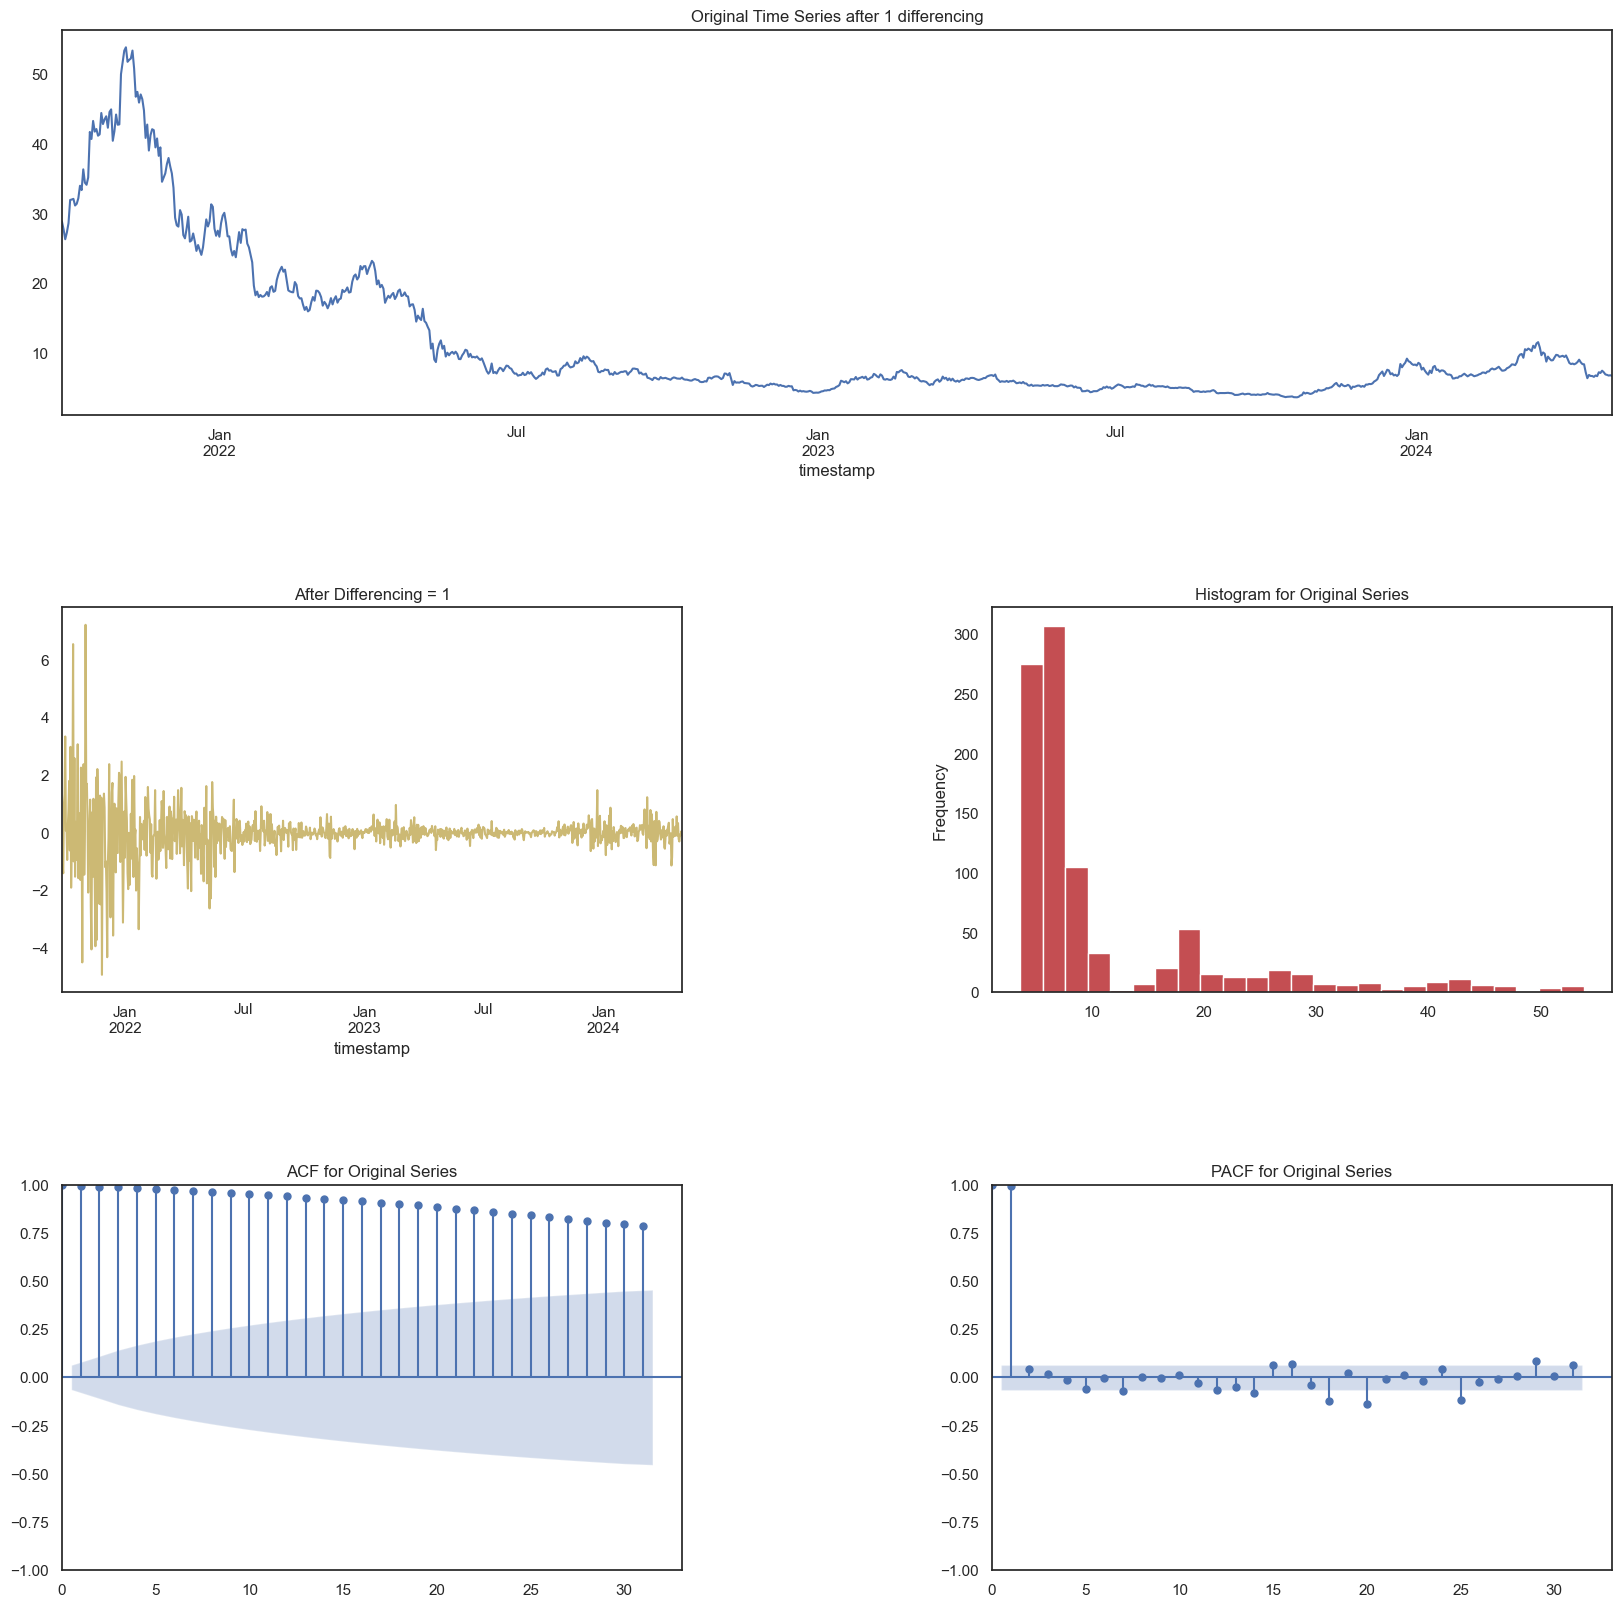

10:23:46 - cmdstanpy - INFO - Chain [1] start processing


Time Interval is given as D
    Correct Time interval given as a valid Pandas date-range frequency...


Building Prophet Model



Running Facebook Prophet Model...
kwargs for Prophet model: {'iter': 100}
    Fit-Predict data (shape=(946, 5)) with Confidence Interval = 0.95...
  Starting Prophet Fit
      No seasonality assumed since seasonality flag is set to False
  Starting Prophet Cross Validation
Max. iterations using expanding window cross validation = 2

Fold Number: 1 --> Train Shape: 926 Test Shape: 10


10:23:47 - cmdstanpy - INFO - Chain [1] done processing
10:23:47 - cmdstanpy - INFO - Chain [1] start processing


    RMSE = 4.98
    Std Deviation of actuals = 0.82
    Normalized RMSE (as pct of std dev) = 606%
Cross Validation window: 1 completed

Fold Number: 2 --> Train Shape: 936 Test Shape: 10


10:23:47 - cmdstanpy - INFO - Chain [1] done processing


    RMSE = 3.25
    Std Deviation of actuals = 0.25
    Normalized RMSE (as pct of std dev) = 1280%
Cross Validation window: 2 completed

-------------------------------------------
Model Cross Validation Results:
-------------------------------------------
    MAE (Mean Absolute Error = 4.06
    MSE (Mean Squared Error = 17.68
    MAPE (Mean Absolute Percent Error) = 58%
    RMSE (Root Mean Squared Error) = 4.2044
    Normalized RMSE (MinMax) = 185%
    Normalized RMSE (as Std Dev of Actuals)= 656%
Time Taken = 2 seconds


10:23:48 - cmdstanpy - INFO - Chain [1] start processing
10:23:48 - cmdstanpy - INFO - Chain [1] done processing


  End of Prophet Fit


Building Auto SARIMAX Model



Running Auto SARIMAX Model...


Best Parameters:
p: None, d: None, q: None
P: None, D: None, Q: None
Seasonality: False
Seasonal Period: 12

Fold Number: 1 --> Train Shape: 926 Test Shape: 10

    Finding the best parameters using AutoArima:
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2226.541, Time=0.10 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2227.214, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2227.238, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2225.195, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2221.521, Time=0.42 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2223.308, Time=0.37 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2231.154, Time=0.17 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2229.155, Time=0.14 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=2229.145, Time=0.12 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2224.518, Time=0.93 sec
 

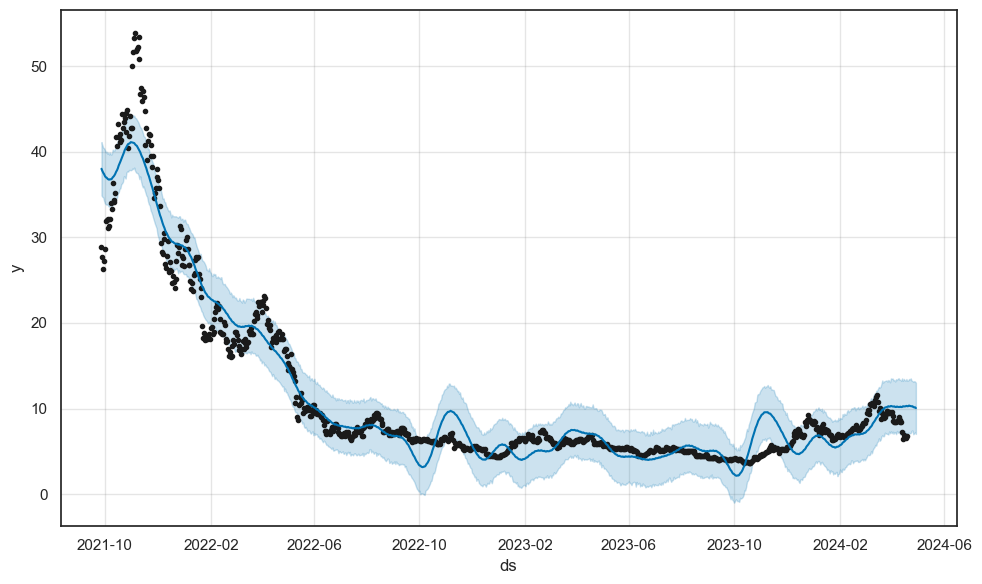

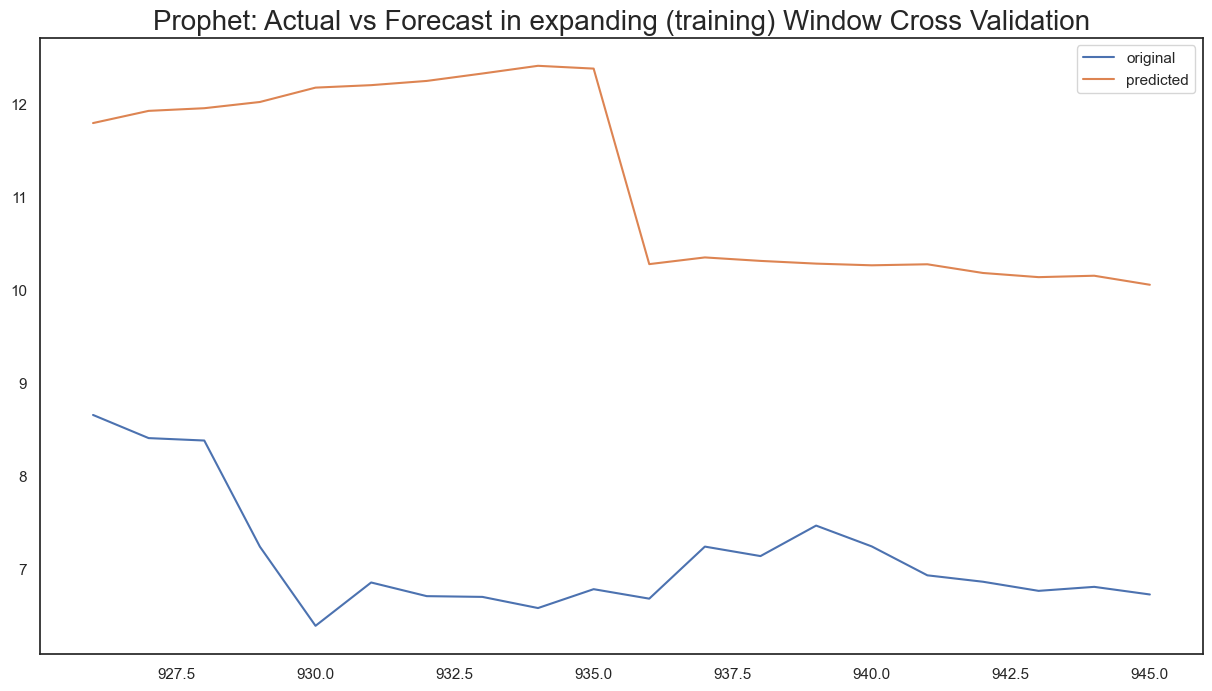

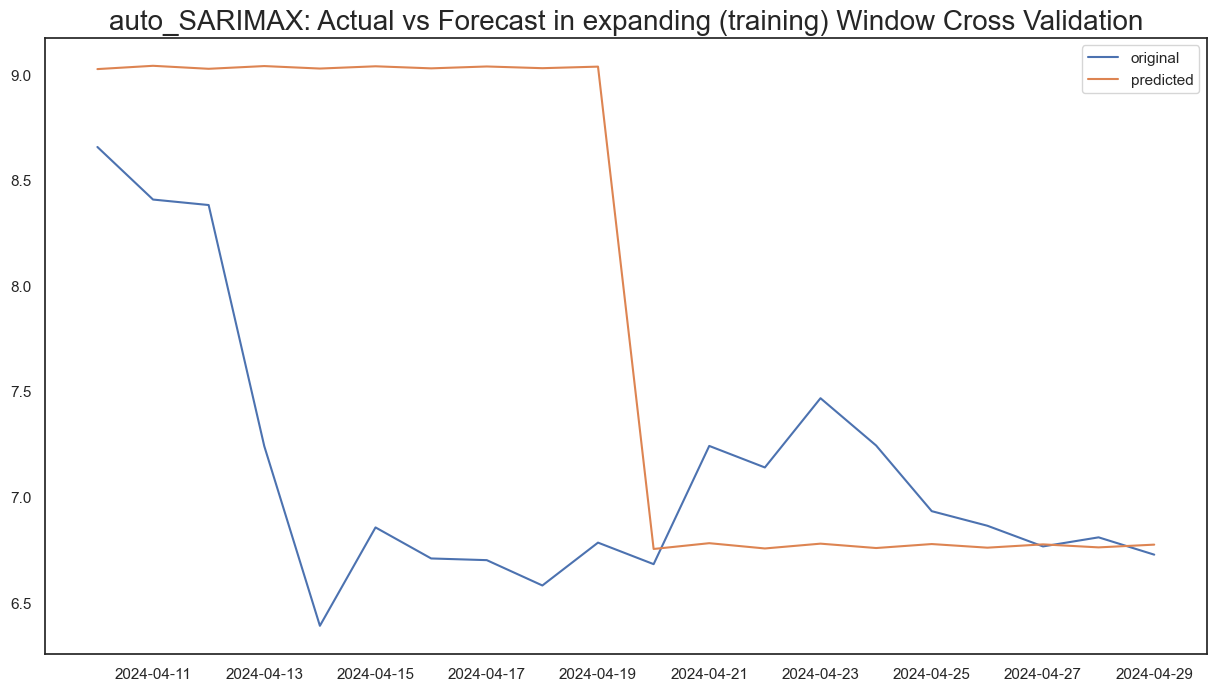

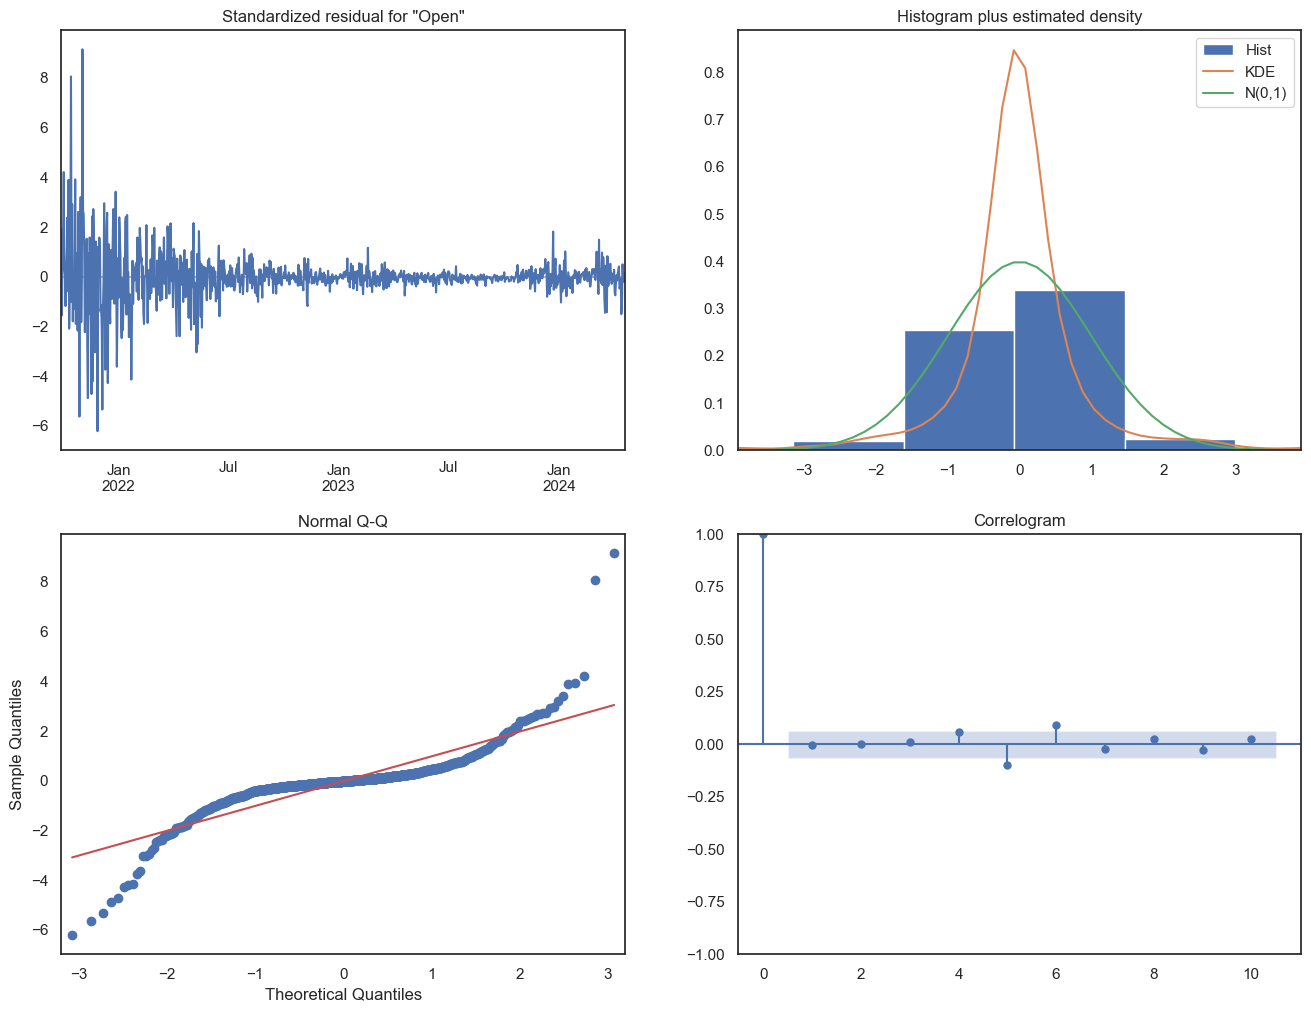

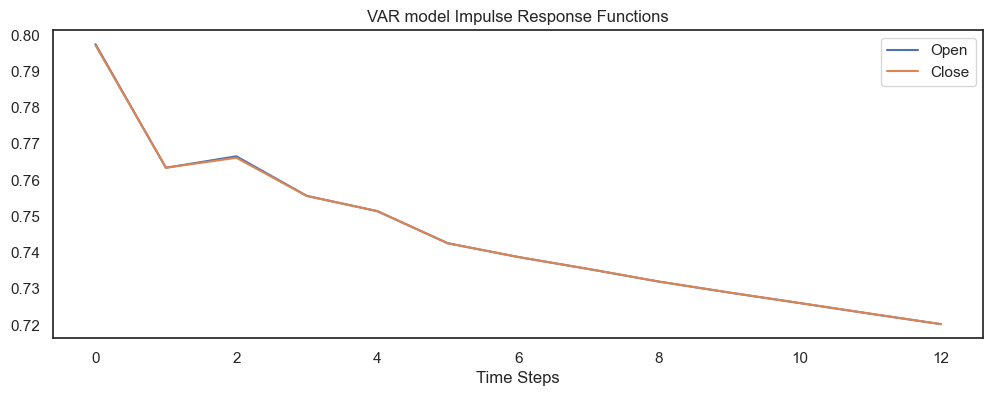

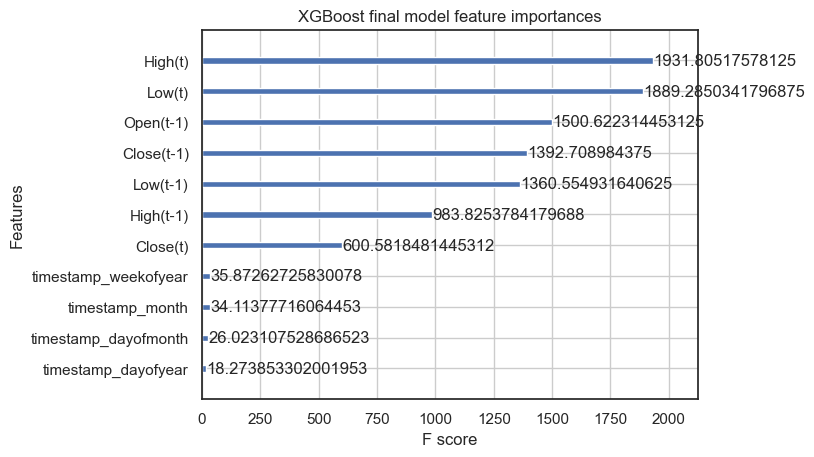

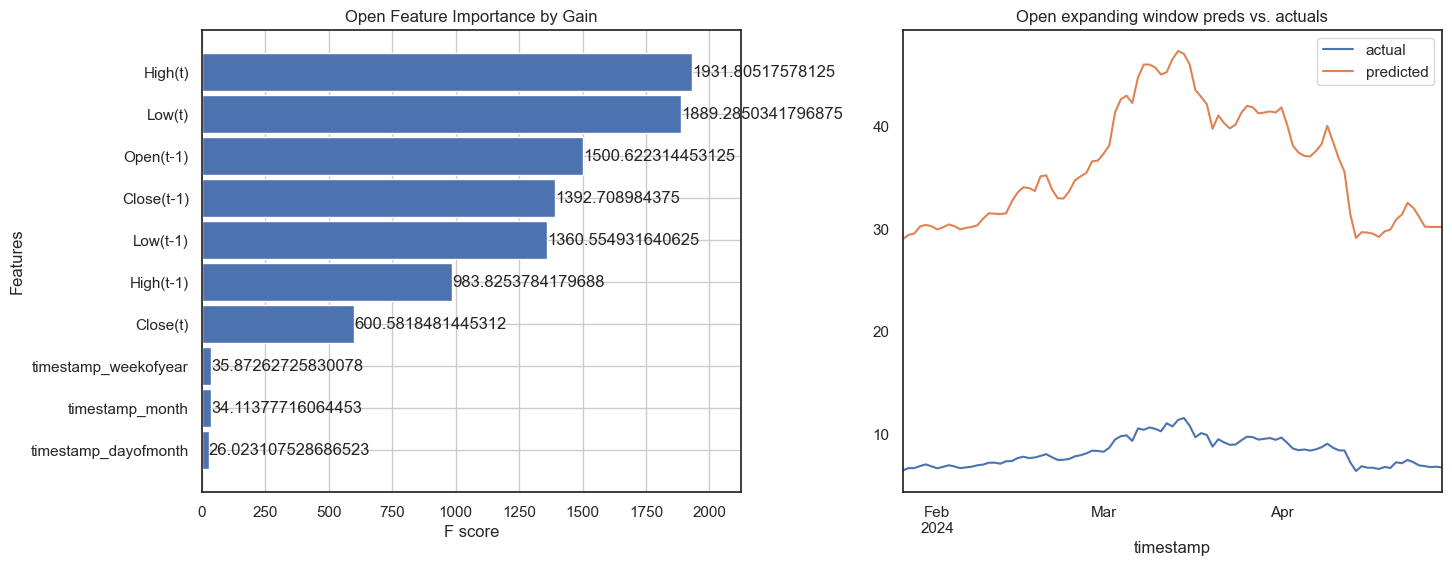

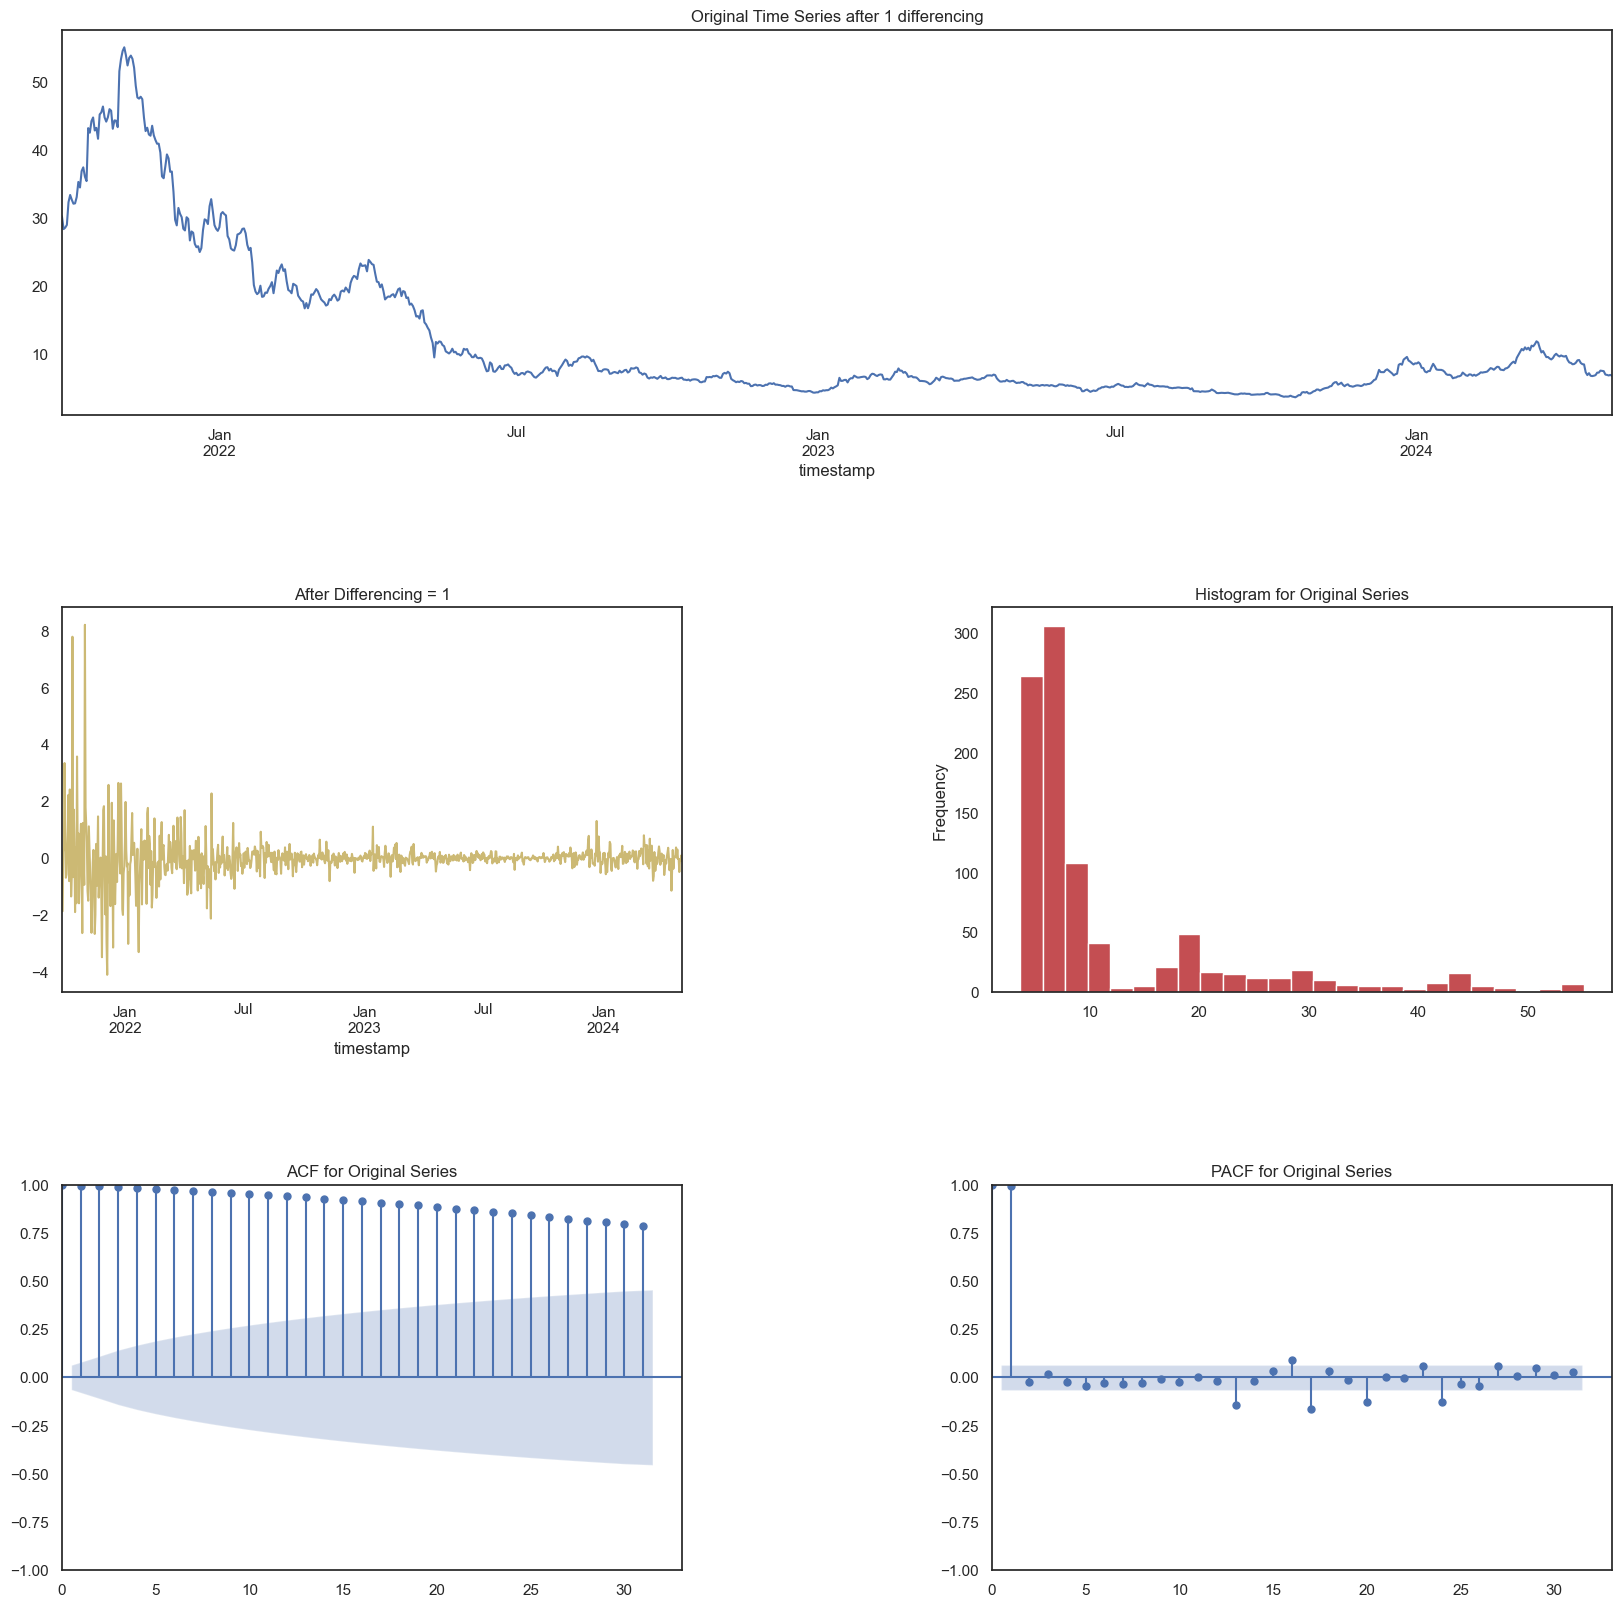

10:32:12 - cmdstanpy - INFO - Chain [1] start processing


Time Interval is given as D
    Correct Time interval given as a valid Pandas date-range frequency...


Building Prophet Model



Running Facebook Prophet Model...
kwargs for Prophet model: {'iter': 100}
    Fit-Predict data (shape=(946, 5)) with Confidence Interval = 0.95...
  Starting Prophet Fit
      No seasonality assumed since seasonality flag is set to False
  Starting Prophet Cross Validation
Max. iterations using expanding window cross validation = 2

Fold Number: 1 --> Train Shape: 926 Test Shape: 10


10:32:12 - cmdstanpy - INFO - Chain [1] done processing
10:32:12 - cmdstanpy - INFO - Chain [1] start processing


    RMSE = 4.76
    Std Deviation of actuals = 0.75
    Normalized RMSE (as pct of std dev) = 633%
Cross Validation window: 1 completed

Fold Number: 2 --> Train Shape: 936 Test Shape: 10


10:32:12 - cmdstanpy - INFO - Chain [1] done processing


    RMSE = 3.77
    Std Deviation of actuals = 0.28
    Normalized RMSE (as pct of std dev) = 1350%
Cross Validation window: 2 completed

-------------------------------------------
Model Cross Validation Results:
-------------------------------------------
    MAE (Mean Absolute Error = 4.22
    MSE (Mean Squared Error = 18.45
    MAPE (Mean Absolute Percent Error) = 59%
    RMSE (Root Mean Squared Error) = 4.2948
    Normalized RMSE (MinMax) = 223%
    Normalized RMSE (as Std Dev of Actuals)= 717%
Time Taken = 1 seconds


10:32:13 - cmdstanpy - INFO - Chain [1] start processing
10:32:13 - cmdstanpy - INFO - Chain [1] done processing


  End of Prophet Fit


Building Auto SARIMAX Model



Running Auto SARIMAX Model...


Best Parameters:
p: None, d: None, q: None
P: None, D: None, Q: None
Seasonality: False
Seasonal Period: 12

Fold Number: 1 --> Train Shape: 926 Test Shape: 10

    Finding the best parameters using AutoArima:
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2053.162, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2044.415, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2043.138, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2052.061, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2040.674, Time=0.35 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2042.457, Time=0.35 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2042.456, Time=0.45 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2042.531, Time=0.14 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=2043.575, Time=0.14 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.12 sec
 ARIMA

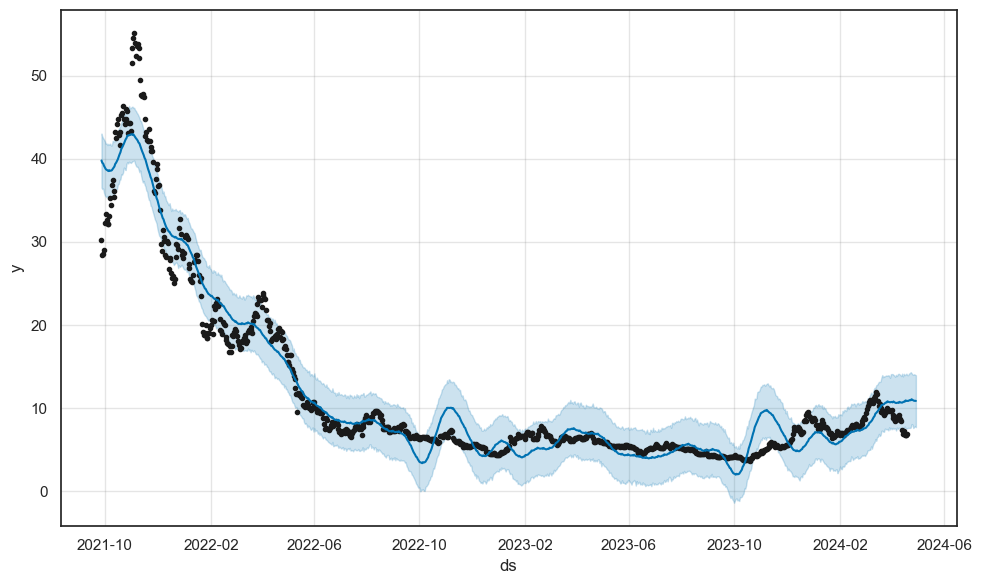

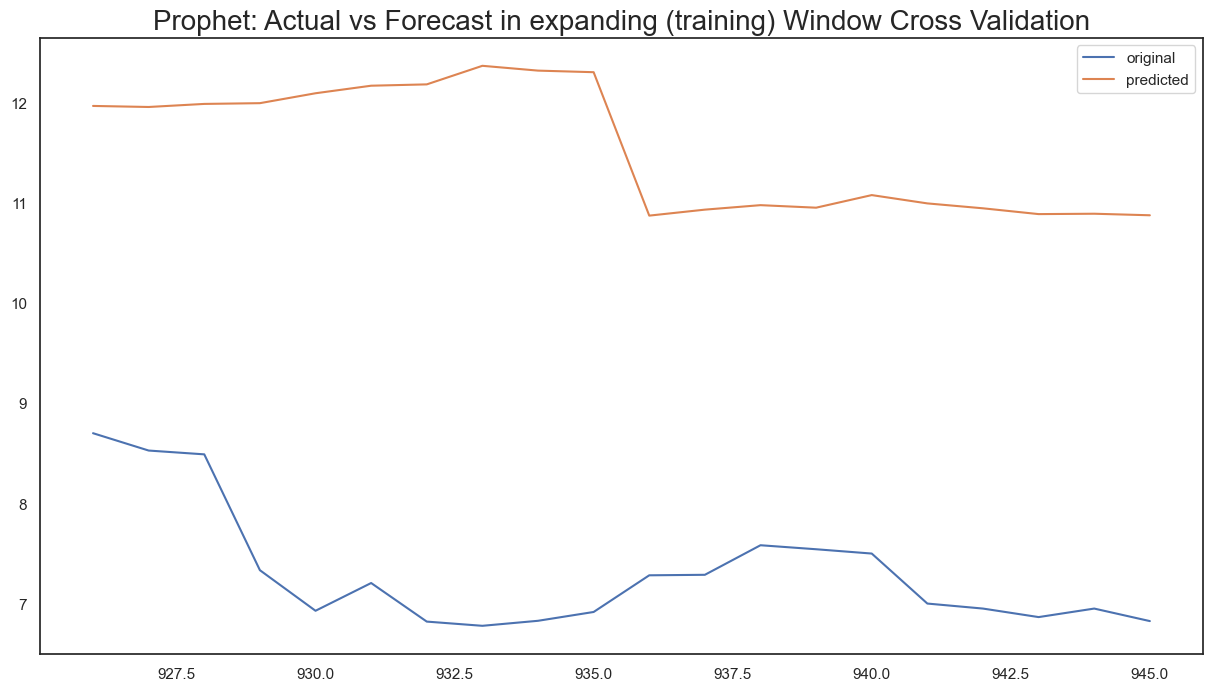

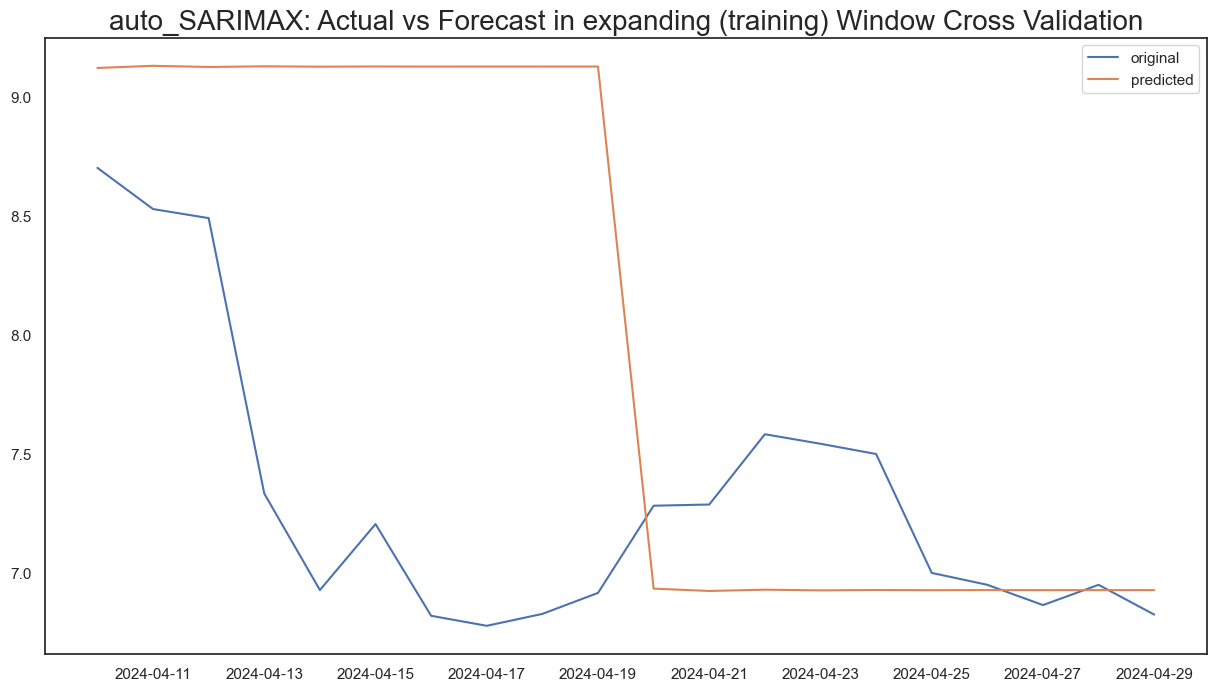

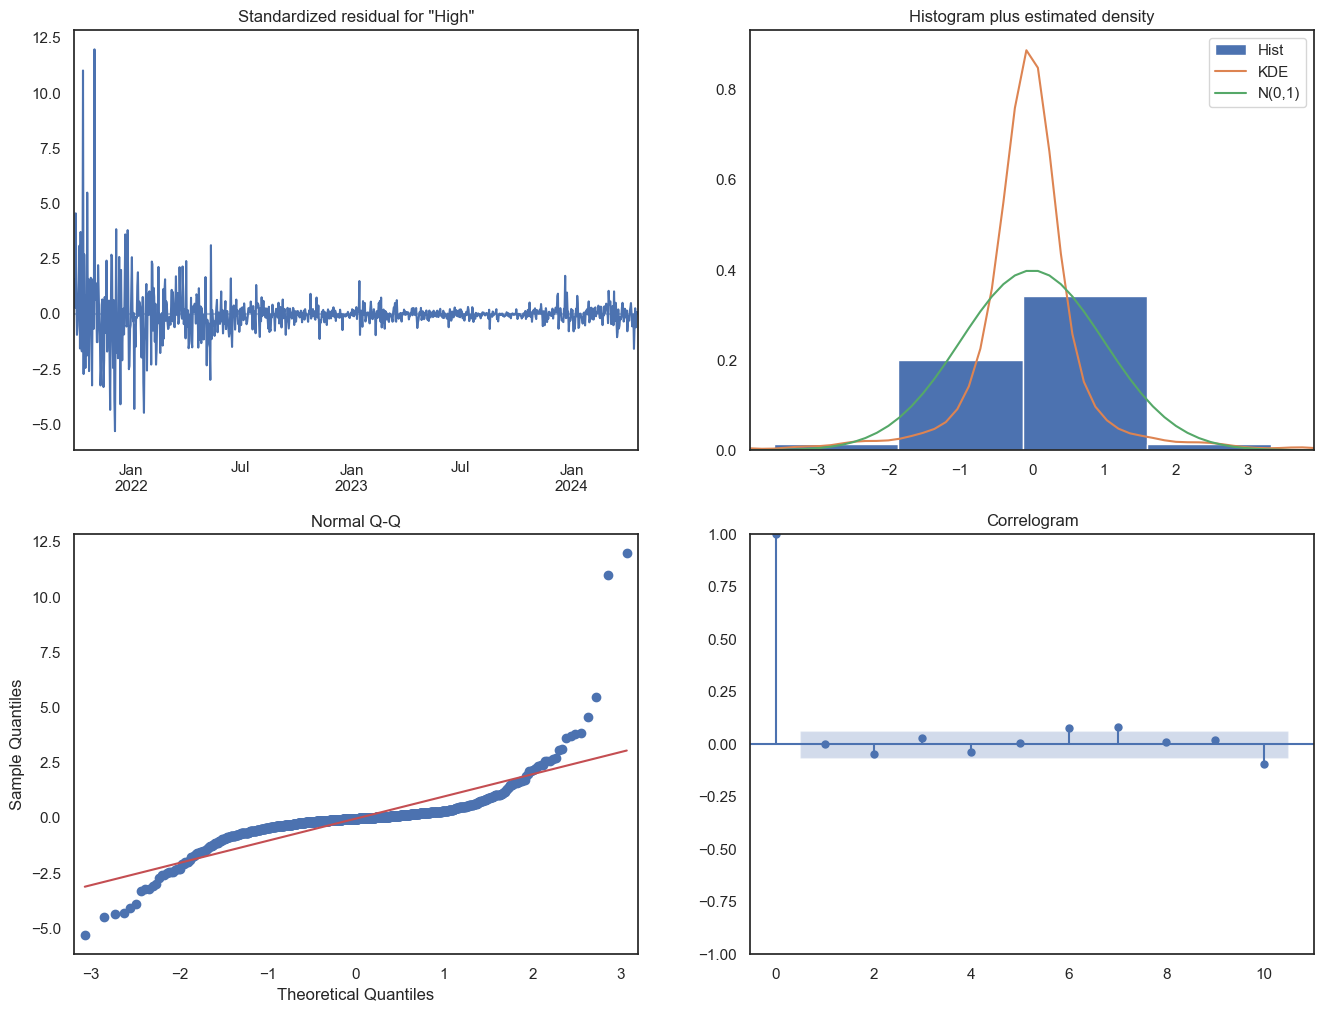

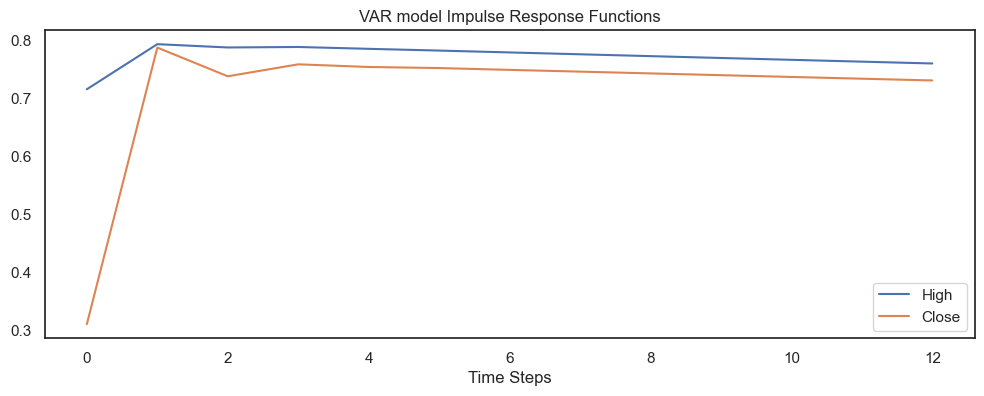

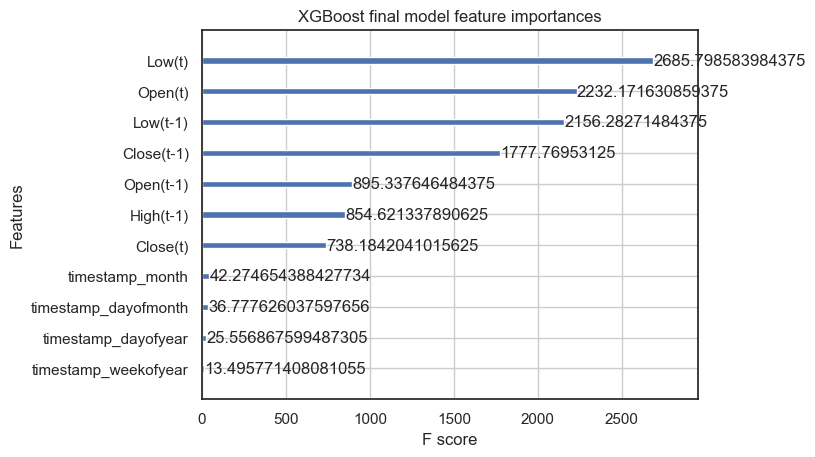

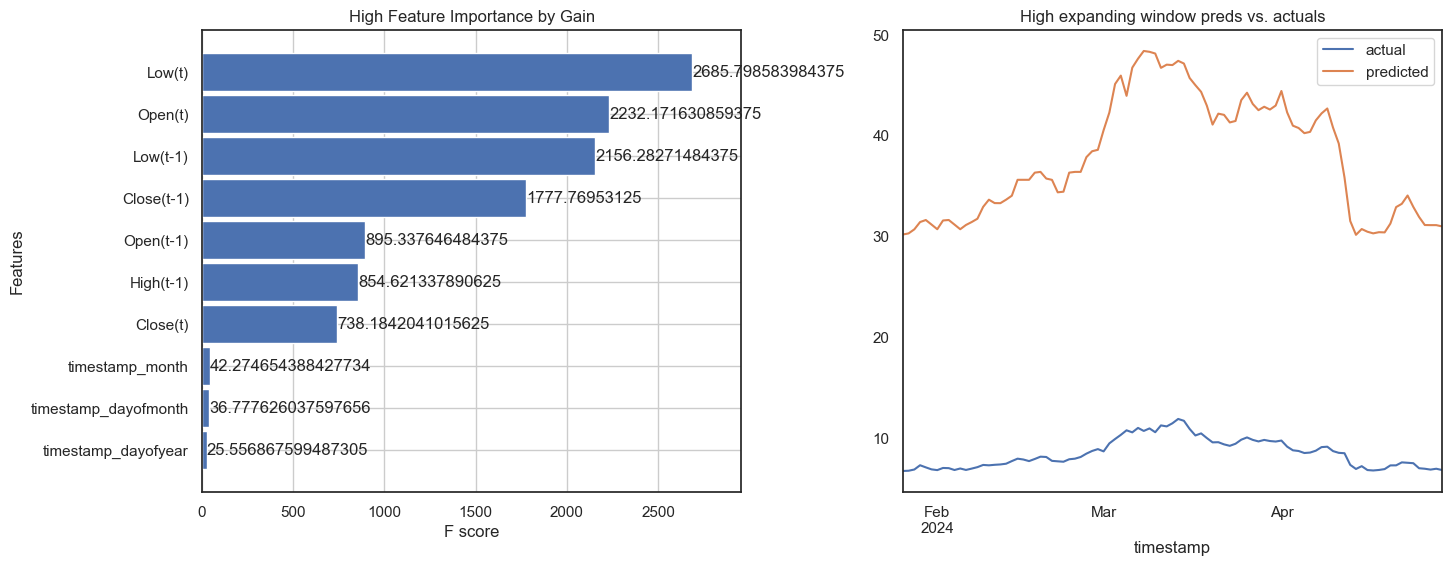

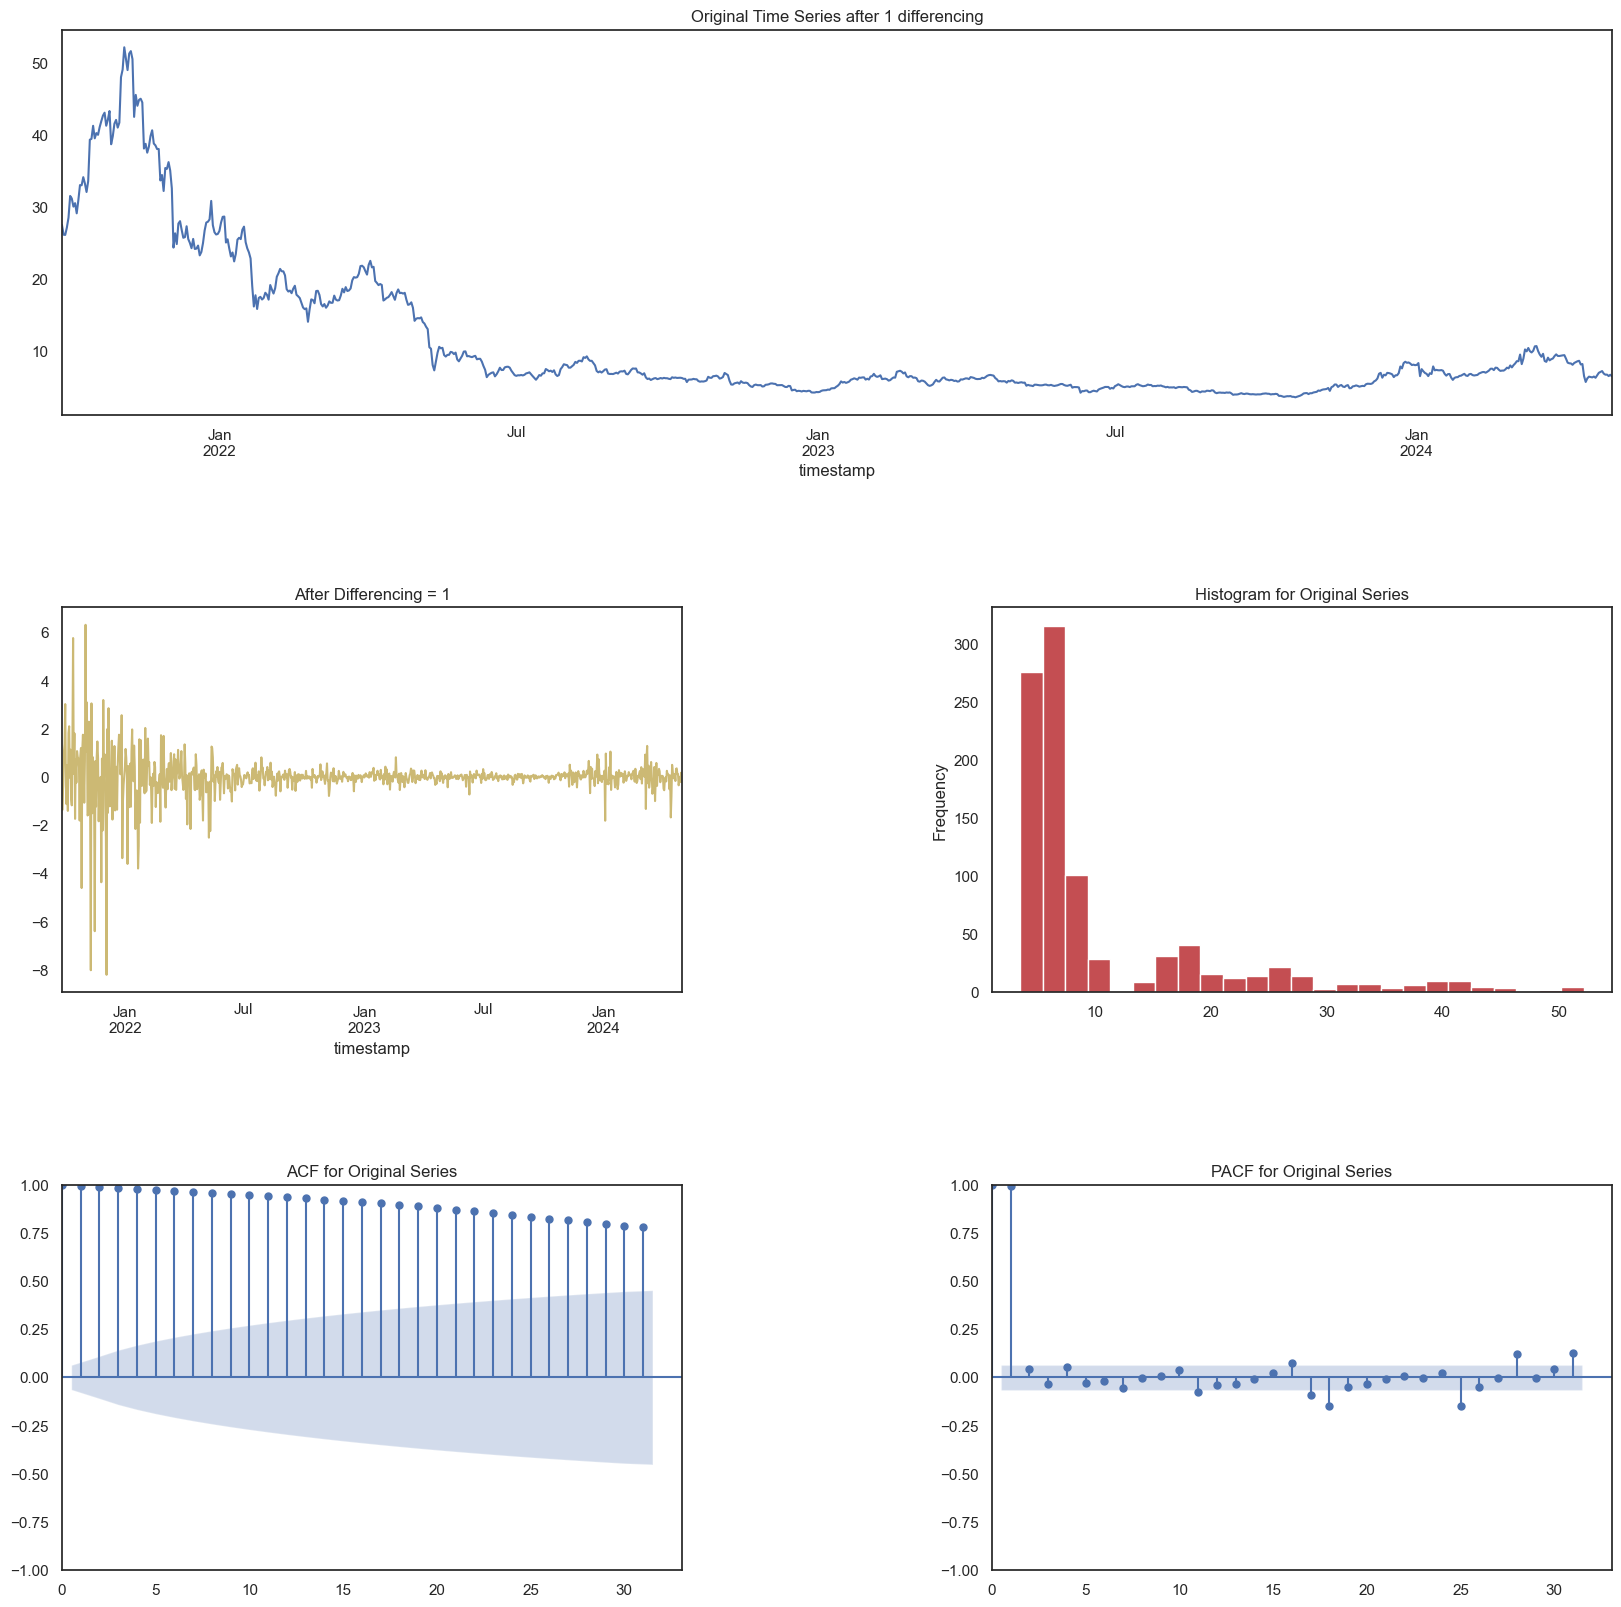

10:41:30 - cmdstanpy - INFO - Chain [1] start processing


Time Interval is given as D
    Correct Time interval given as a valid Pandas date-range frequency...


Building Prophet Model



Running Facebook Prophet Model...
kwargs for Prophet model: {'iter': 100}
    Fit-Predict data (shape=(946, 5)) with Confidence Interval = 0.95...
  Starting Prophet Fit
      No seasonality assumed since seasonality flag is set to False
  Starting Prophet Cross Validation
Max. iterations using expanding window cross validation = 2

Fold Number: 1 --> Train Shape: 926 Test Shape: 10


10:41:30 - cmdstanpy - INFO - Chain [1] done processing
10:41:31 - cmdstanpy - INFO - Chain [1] start processing


    RMSE = 4.59
    Std Deviation of actuals = 0.78
    Normalized RMSE (as pct of std dev) = 588%
Cross Validation window: 1 completed

Fold Number: 2 --> Train Shape: 936 Test Shape: 10


10:41:31 - cmdstanpy - INFO - Chain [1] done processing


    RMSE = 3.44
    Std Deviation of actuals = 0.23
    Normalized RMSE (as pct of std dev) = 1491%
Cross Validation window: 2 completed

-------------------------------------------
Model Cross Validation Results:
-------------------------------------------
    MAE (Mean Absolute Error = 3.96
    MSE (Mean Squared Error = 16.43
    MAPE (Mean Absolute Percent Error) = 60%
    RMSE (Root Mean Squared Error) = 4.0532
    Normalized RMSE (MinMax) = 163%
    Normalized RMSE (as Std Dev of Actuals)= 683%
Time Taken = 1 seconds


10:41:31 - cmdstanpy - INFO - Chain [1] start processing
10:41:31 - cmdstanpy - INFO - Chain [1] done processing


  End of Prophet Fit


Building Auto SARIMAX Model



Running Auto SARIMAX Model...


Best Parameters:
p: None, d: None, q: None
P: None, D: None, Q: None
Seasonality: False
Seasonal Period: 12

Fold Number: 1 --> Train Shape: 926 Test Shape: 10

    Finding the best parameters using AutoArima:
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2294.607, Time=0.10 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2295.725, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2295.799, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2293.160, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2276.278, Time=0.43 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2277.977, Time=0.53 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2277.978, Time=0.57 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2295.993, Time=0.14 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=2295.516, Time=0.10 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2280.275, Time=0.57 sec
 

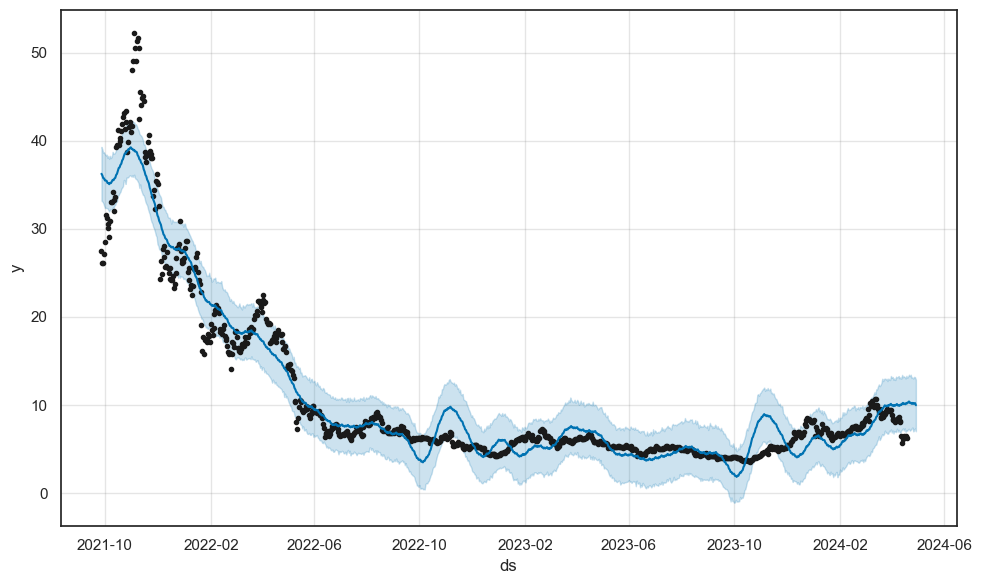

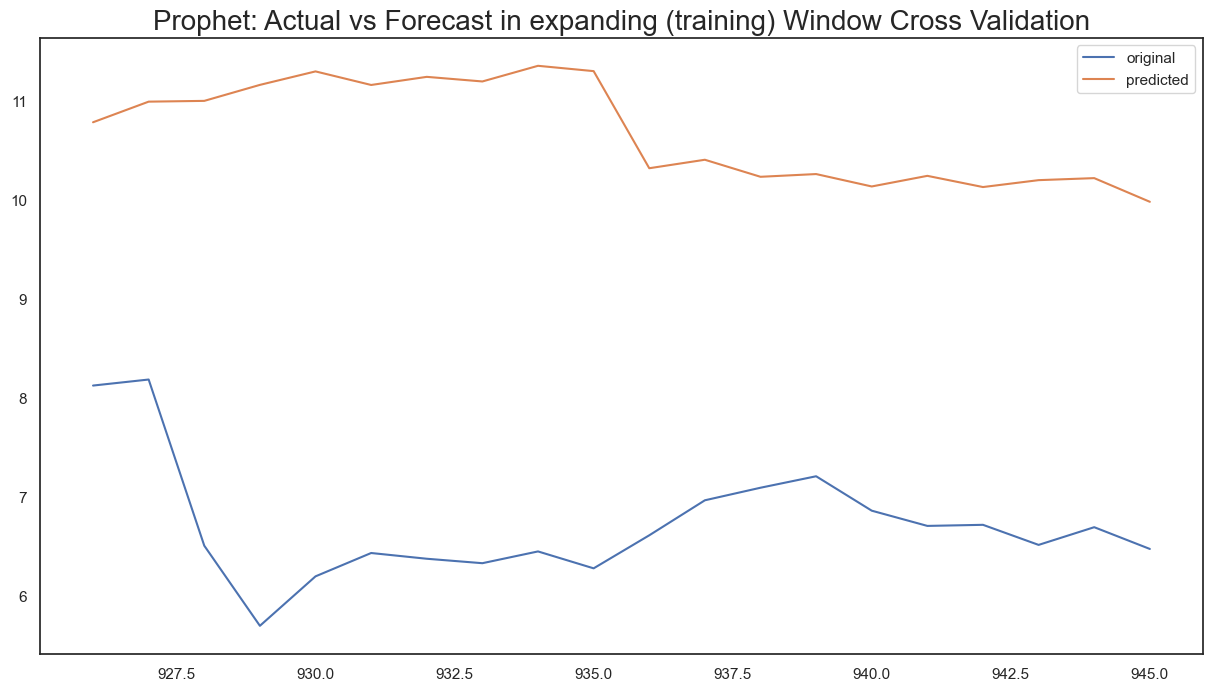

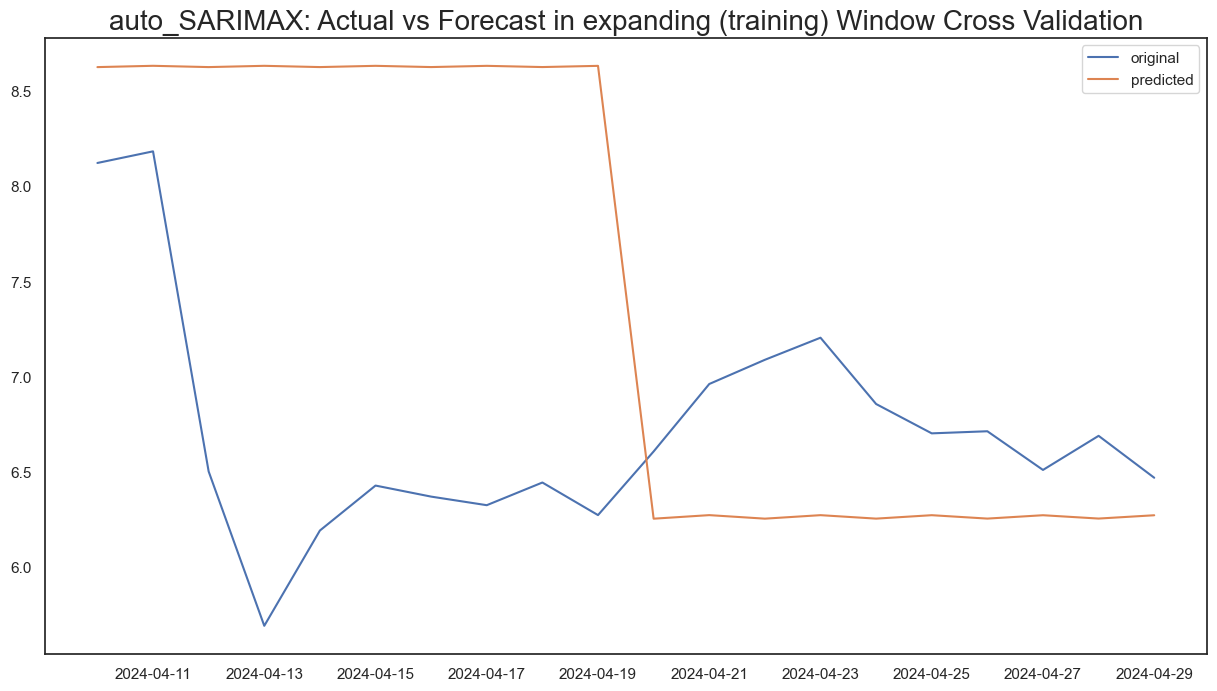

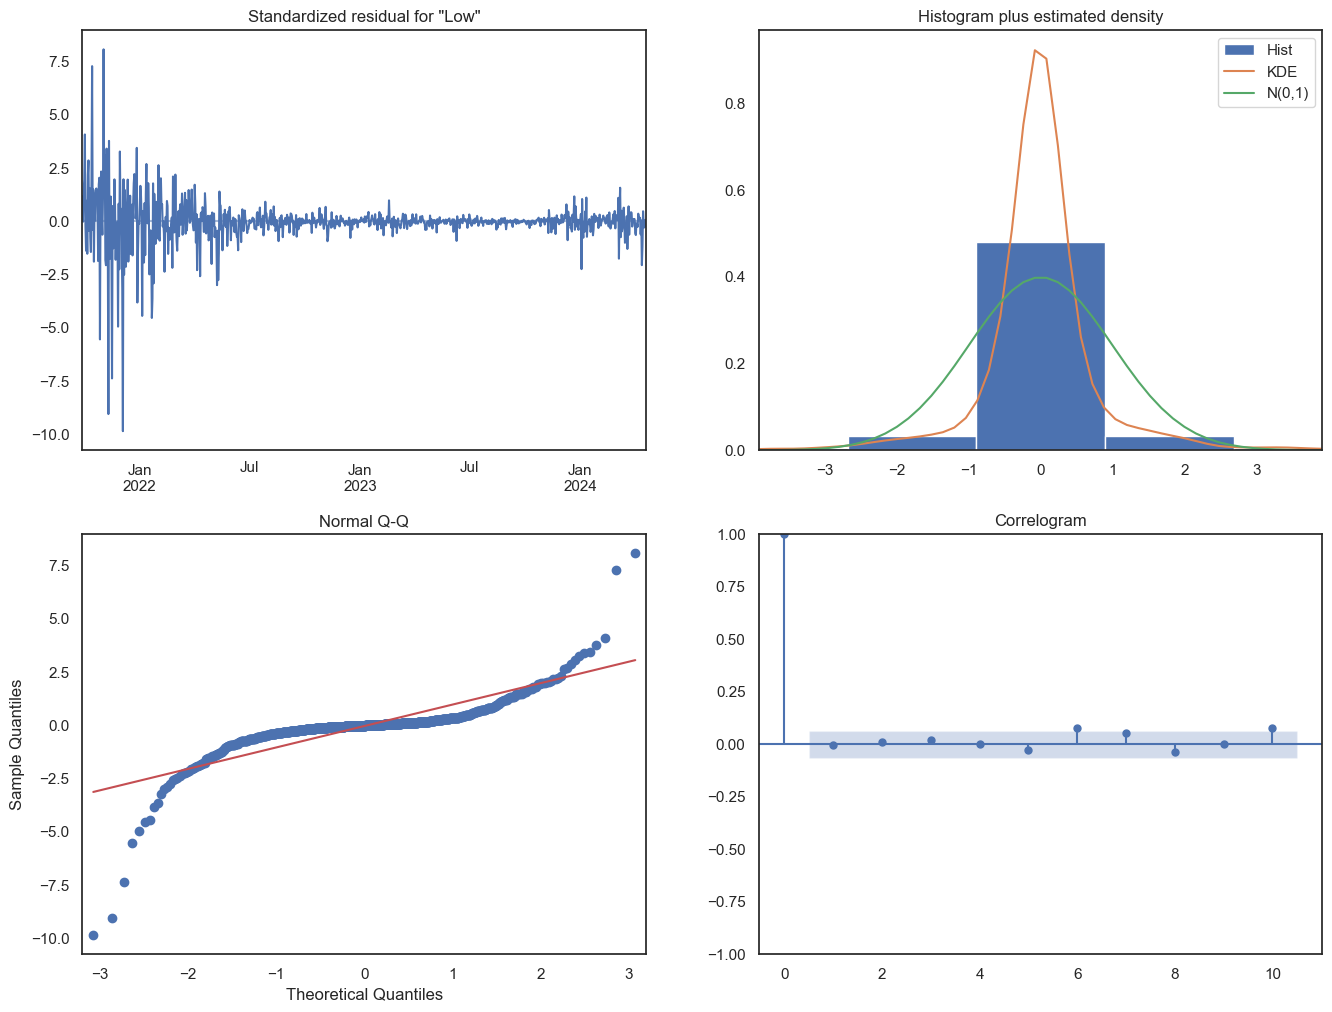

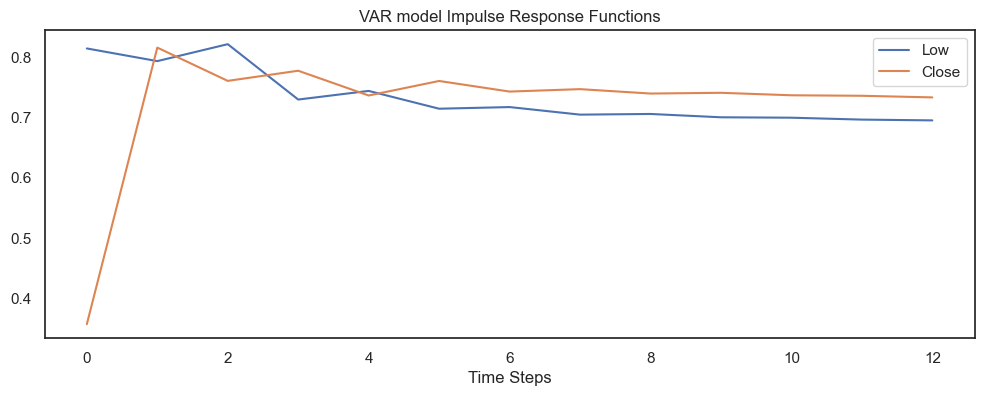

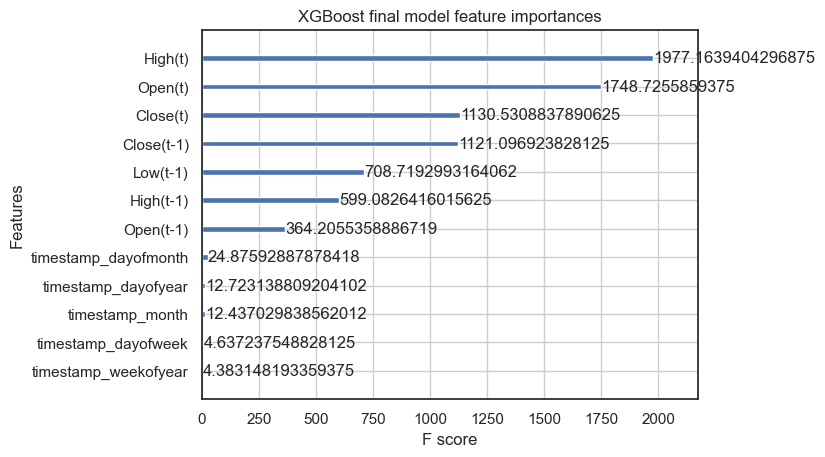

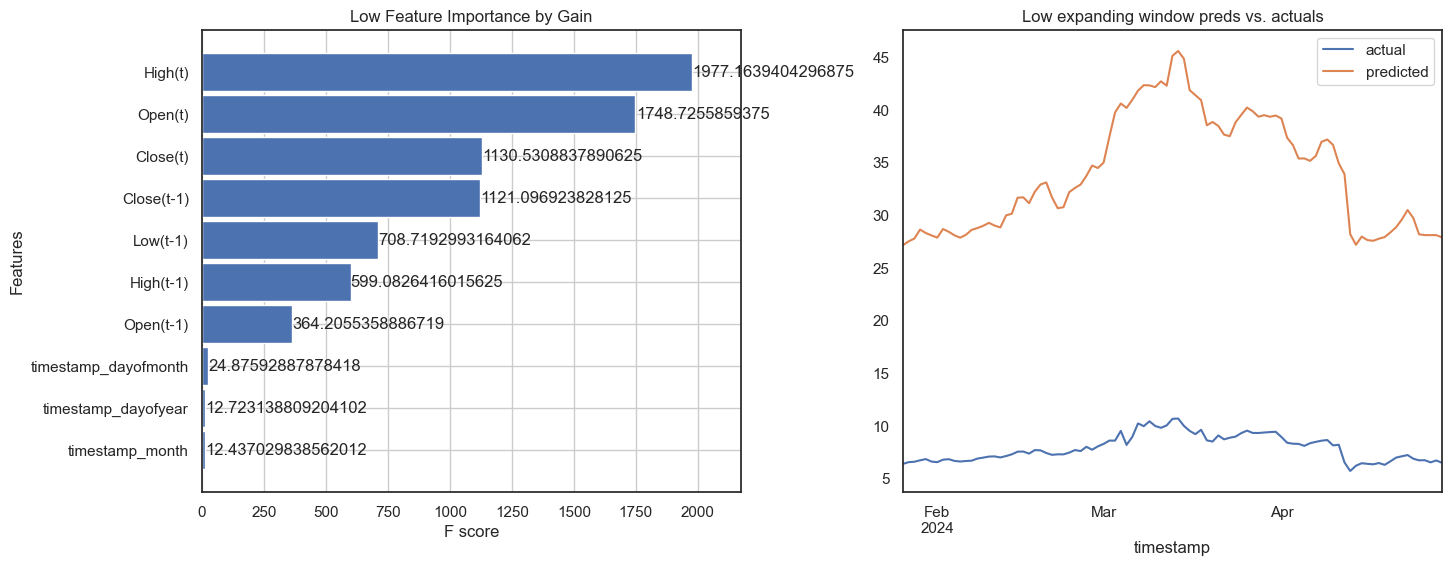

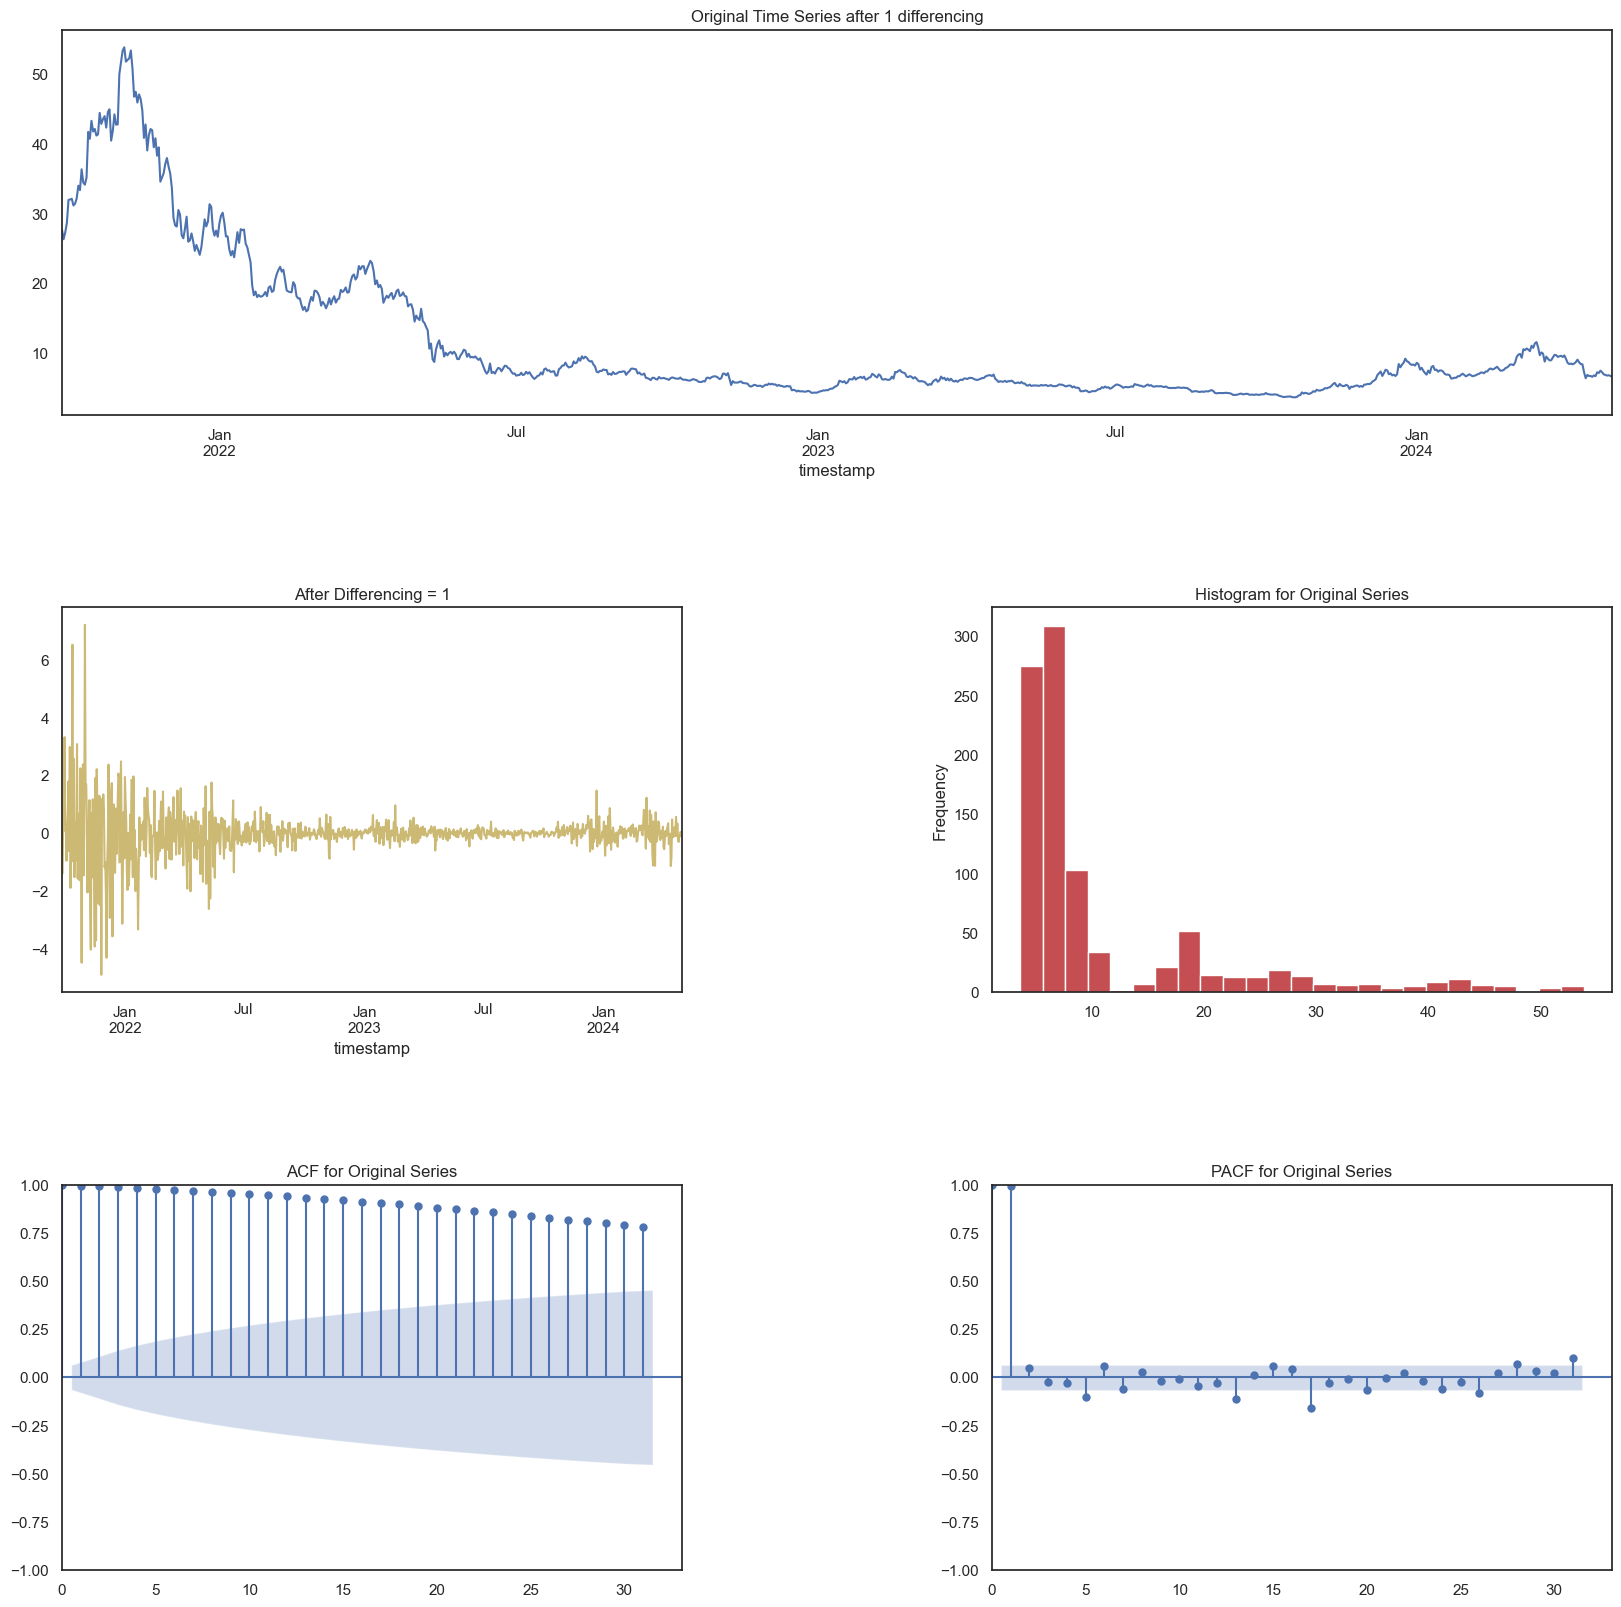

10:50:41 - cmdstanpy - INFO - Chain [1] start processing


Time Interval is given as D
    Correct Time interval given as a valid Pandas date-range frequency...


Building Prophet Model



Running Facebook Prophet Model...
kwargs for Prophet model: {'iter': 100}
    Fit-Predict data (shape=(946, 5)) with Confidence Interval = 0.95...
  Starting Prophet Fit
      No seasonality assumed since seasonality flag is set to False
  Starting Prophet Cross Validation
Max. iterations using expanding window cross validation = 2

Fold Number: 1 --> Train Shape: 926 Test Shape: 10


10:50:41 - cmdstanpy - INFO - Chain [1] done processing
10:50:41 - cmdstanpy - INFO - Chain [1] start processing


    RMSE = 5.51
    Std Deviation of actuals = 0.69
    Normalized RMSE (as pct of std dev) = 797%
Cross Validation window: 1 completed

Fold Number: 2 --> Train Shape: 936 Test Shape: 10


10:50:42 - cmdstanpy - INFO - Chain [1] done processing


    RMSE = 3.46
    Std Deviation of actuals = 0.27
    Normalized RMSE (as pct of std dev) = 1300%
Cross Validation window: 2 completed

-------------------------------------------
Model Cross Validation Results:
-------------------------------------------
    MAE (Mean Absolute Error = 4.45
    MSE (Mean Squared Error = 21.20
    MAPE (Mean Absolute Percent Error) = 64%
    RMSE (Root Mean Squared Error) = 4.6040
    Normalized RMSE (MinMax) = 228%
    Normalized RMSE (as Std Dev of Actuals)= 852%
Time Taken = 1 seconds


10:50:42 - cmdstanpy - INFO - Chain [1] start processing
10:50:42 - cmdstanpy - INFO - Chain [1] done processing


  End of Prophet Fit


Building Auto SARIMAX Model



Running Auto SARIMAX Model...


Best Parameters:
p: None, d: None, q: None
P: None, D: None, Q: None
Seasonality: False
Seasonal Period: 12

Fold Number: 1 --> Train Shape: 926 Test Shape: 10

    Finding the best parameters using AutoArima:
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2223.736, Time=0.12 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2224.236, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2224.266, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2222.344, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2217.813, Time=0.35 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2228.150, Time=0.14 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2228.161, Time=0.17 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2226.159, Time=0.14 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=2226.153, Time=0.12 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2220.301, Time=1.07 sec
 

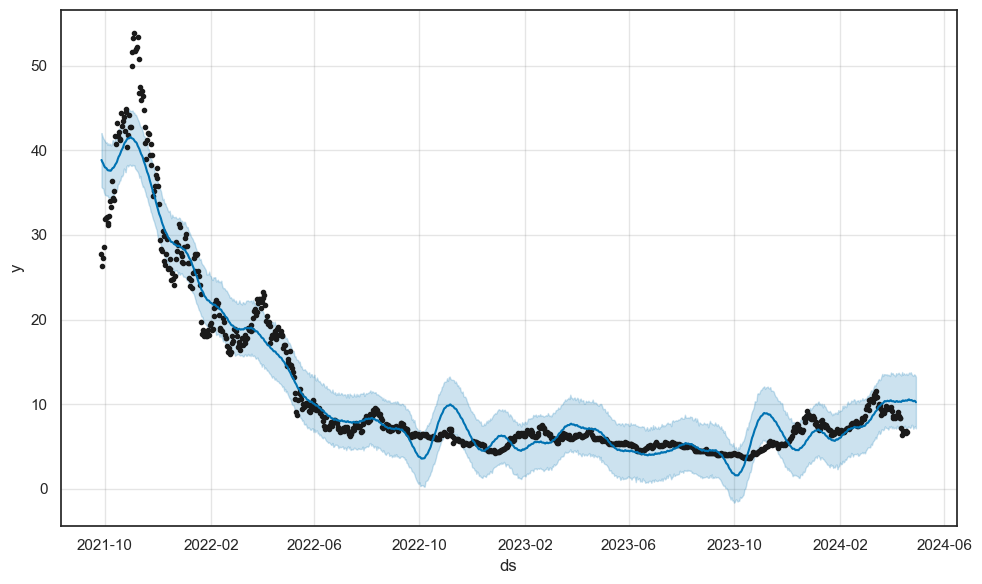

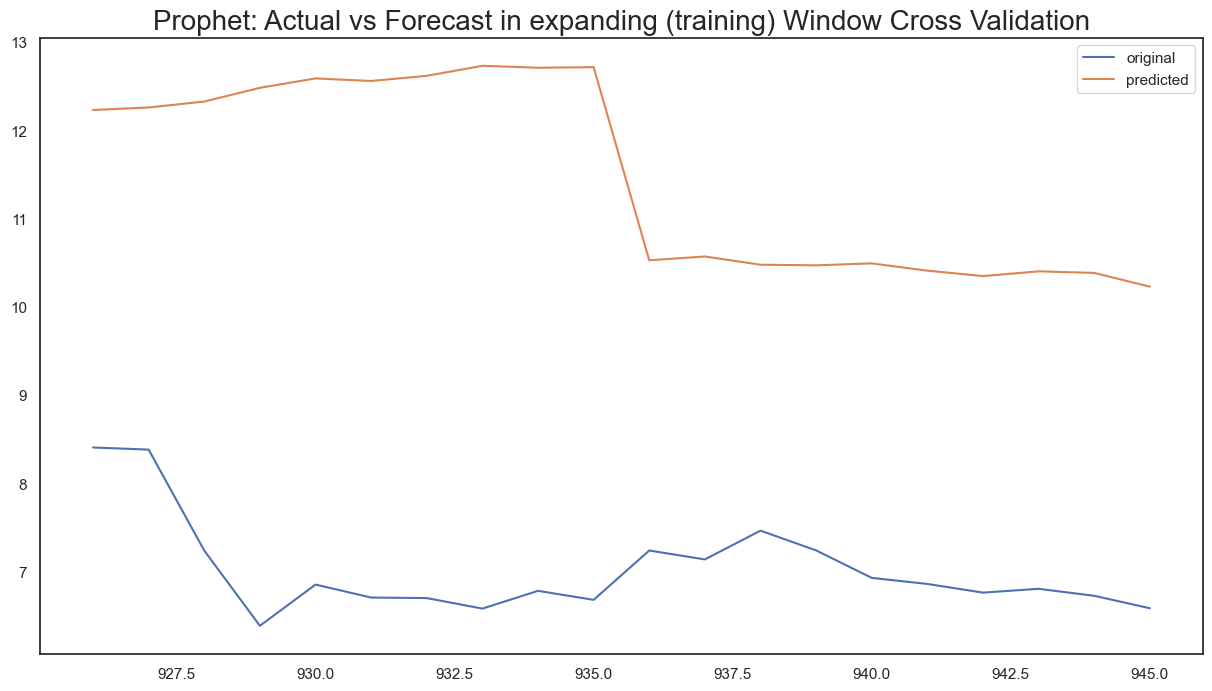

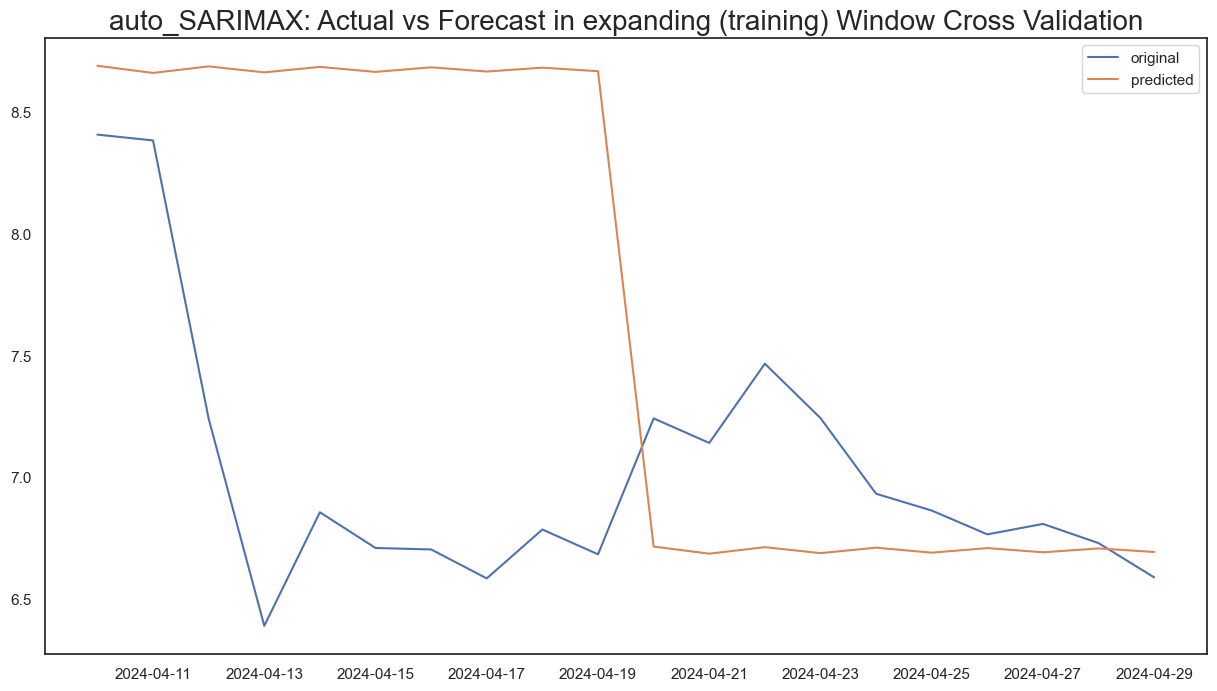

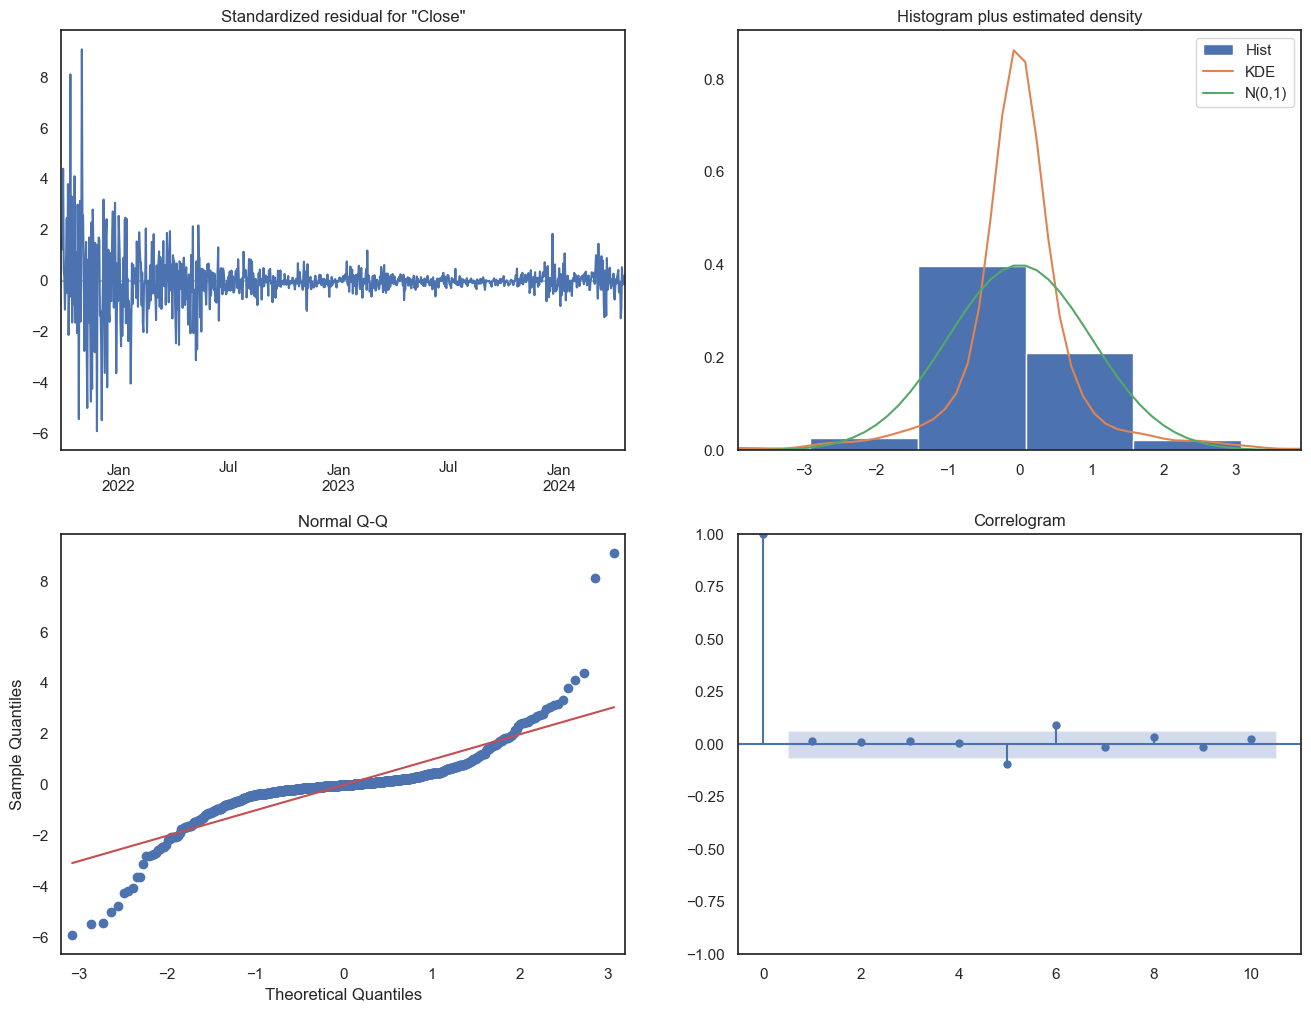

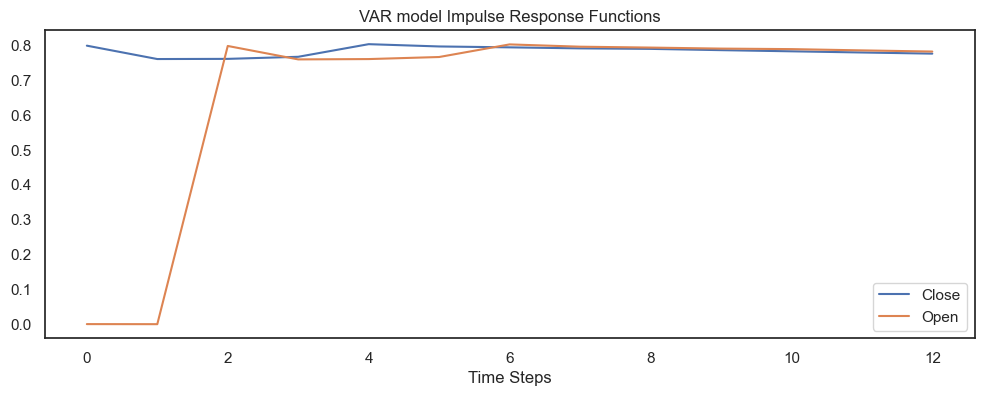

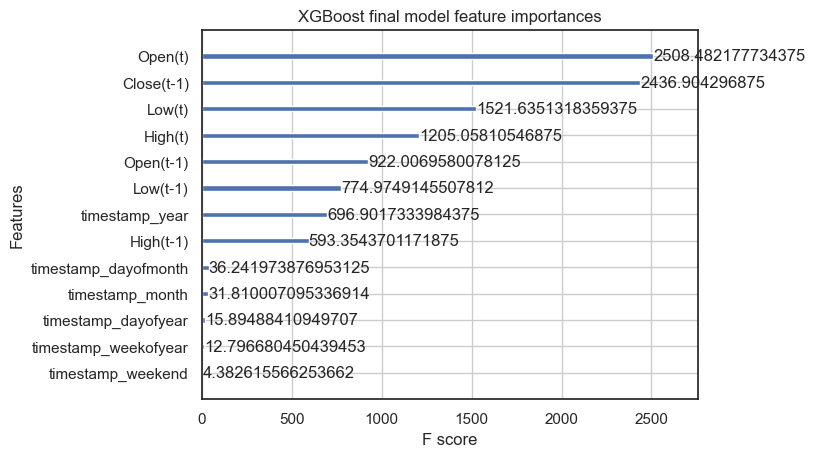

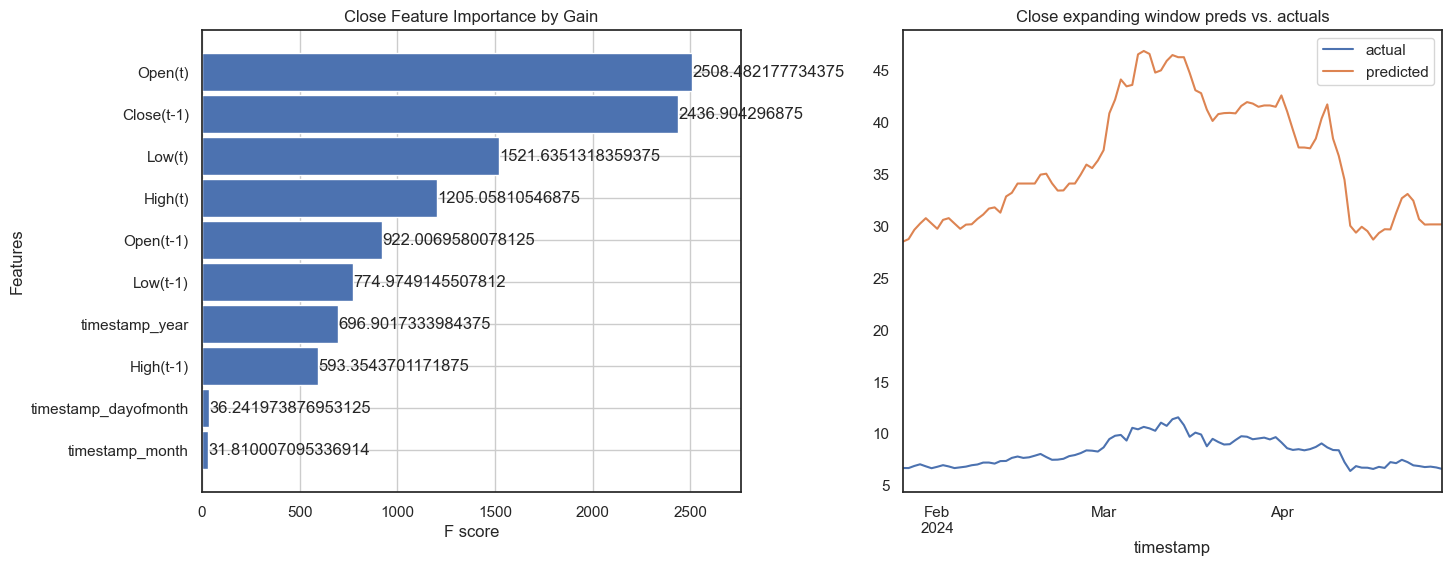

In [304]:
# Iterar sobre cada columna seleccionada
for column in columns:
    # Excluir 'Open_time' del bucle de iteración
    if column != 'Open_time':
        model = auto_timeseries(score_type='rmse', time_interval='D',
                                non_seasonal_pdq=None, seasonality=False,
                                model_type='best', verbose=2, forecast_period=n_days_to_predict)
        
        # Con CV 1 genero resultados aceptables, creo que seleccion modelos de ML. Asi que quizas podria
        # probar con model_type ML y CV 5/10
        model.fit(train, ts_column='timestamp', target=column, cv=2)
        
        # Guardar el modelo en el diccionario
        trained_models[column] = model

#### Indicadores Tecnicos

In [305]:
def calcular_indicadores_tecnicos(historico_precio):
    close_prices = np.array(historico_precio['Close'], dtype=np.double)
    high_prices = np.array(historico_precio['High'], dtype=np.double)
    low_prices = np.array(historico_precio['Low'], dtype=np.double)
    
    # Media Móvil Simple (SMA)
    sma_20 = talib.SMA(close_prices, timeperiod=20)
    
    # Media Móvil Exponencial (EMA)
    ema_20 = talib.EMA(close_prices, timeperiod=20)
    
    # Bandas de Bollinger
    upper_band, middle_band, lower_band = talib.BBANDS(close_prices, timeperiod=20, nbdevup=2, nbdevdn=2)
    
    # Índice de Fuerza Relativa (RSI)
    rsi = talib.RSI(close_prices, timeperiod=14)
    
    # MACD (Convergencia/Divergencia de Medias Móviles)
    macd, signal, _ = talib.MACD(close_prices, fastperiod=12, slowperiod=26, signalperiod=9)
    
    # ADX (Índice Direccional Promedio)
    adx = talib.ADX(high_prices, low_prices, close_prices, timeperiod=14)
    
    # Estocástico
    slowk, slowd = talib.STOCH(high_prices, low_prices, close_prices, fastk_period=14, slowk_period=3, slowk_matype=0, slowd_period=3, slowd_matype=0)
    
    # Índice de Canal de Materias Primas 
    cci = talib.CCI(high_prices, low_prices, close_prices, timeperiod=14)
    
    # ATR (Average True Range)
    atr = talib.ATR(high_prices, low_prices, close_prices, timeperiod=14)
    
    indicadores = pd.DataFrame({
        'SMA_20': sma_20,
        'EMA_20': ema_20,
        'Upper_Band': upper_band,
        'Middle_Band': middle_band,
        'Lower_Band': lower_band,
        'RSI': rsi,
        'MACD': macd,
        'Signal': signal,
        'ADX': adx,
        'SlowK': slowk,
        'SlowD': slowd,
        'CCI': cci,
        'ATR': atr
    }, index=historico_precio.index)
    
    return indicadores

In [306]:
forecast_results = {}

for column in columns:
    future_predictions = trained_models[column].predict(testdata=val)
    forecast_results[column] = future_predictions

# Mostrar los resultados del pronóstico
for column, predictions in forecast_results.items():
    print(f"Pronóstico para la columna '{column}':")
    display(predictions)
    print()

Predicting using test dataframe as input for auto_SARIMAX model
Predicting using test dataframe as input for auto_SARIMAX model
Predicting using test dataframe as input for VAR model
Predicting using test dataframe as input for auto_SARIMAX model
Pronóstico para la columna 'Open':


Open,yhat,mean_se,mean_ci_lower,mean_ci_upper
2024-04-30,6.49,0.44,5.63,7.35
2024-05-01,6.38,0.52,5.35,7.40
2024-05-02,6.78,0.62,5.56,8.00
2024-05-03,6.96,0.70,5.59,8.33
2024-05-04,7.04,0.77,5.53,8.55
2024-05-05,6.94,0.84,5.31,8.58
2024-05-06,7.18,0.90,5.43,8.94
2024-05-07,7.10,0.95,5.24,8.97
2024-05-08,6.98,1.01,5.01,8.95
2024-05-09,6.79,1.06,4.72,8.86



Pronóstico para la columna 'High':


High,yhat,mean_se,mean_ci_lower,mean_ci_upper
2024-04-30,6.73,0.33,6.09,7.38
2024-05-01,6.95,0.34,6.29,7.62
2024-05-02,7.36,0.35,6.68,8.04
2024-05-03,7.48,0.36,6.78,8.18
2024-05-04,7.34,0.37,6.62,8.06
2024-05-05,7.42,0.37,6.69,8.16
2024-05-06,7.39,0.38,6.64,8.14
2024-05-07,7.20,0.39,6.44,7.97
2024-05-08,7.14,0.40,6.36,7.92
2024-05-09,7.22,0.40,6.42,8.01



Pronóstico para la columna 'Low':


Low,yhat,mean_se,mean_ci_lower,mean_ci_upper
2024-04-30,6.51,0.81,4.92,8.09
2024-05-01,6.48,1.13,4.26,8.70
2024-05-02,6.52,1.40,3.77,9.26
2024-05-03,6.53,1.59,3.42,9.63
2024-05-04,6.55,1.75,3.12,9.99
2024-05-05,6.57,1.90,2.85,10.29
2024-05-06,6.59,2.03,2.61,10.58
2024-05-07,6.61,2.16,2.38,10.83
2024-05-08,6.63,2.27,2.17,11.08
2024-05-09,6.65,2.38,1.98,11.31



Pronóstico para la columna 'Close':


Close,yhat,mean_se,mean_ci_lower,mean_ci_upper
2024-04-30,6.35,0.38,5.61,7.08
2024-05-01,6.69,0.44,5.82,7.56
2024-05-02,7.06,0.51,6.07,8.05
2024-05-03,6.99,0.56,5.89,8.09
2024-05-04,6.99,0.61,5.79,8.20
2024-05-05,7.11,0.66,5.82,8.41
2024-05-06,7.09,0.70,5.71,8.47
2024-05-07,7.03,0.75,5.57,8.49
2024-05-08,6.99,0.78,5.46,8.53
2024-05-09,6.87,0.82,5.26,8.48


#### Guardo el mejor modelo para cada columna

In [307]:
for column, model in trained_models.items():
    # Guarda el modelo en un archivo usando dill
    with open(f"auto_ts_models/{column}.pkl", "wb") as file:
        dill.dump(model, file)

#### Vuelvo a armar el mejor modelo para cada columna

In [308]:
loaded_models = {}

# Itera sobre los archivos guardados
for column in columns:
    if column != 'Open_time':
        # Cargar el modelo desde el archivo
        with open(f"auto_ts_models/{column}.pkl", "rb") as file:
            loaded_model = dill.load(file)
        
        # Guardar el modelo cargado en el diccionario
        loaded_models[column] = loaded_model

#### Prediccion N dias en el futuro

In [309]:
predictions_df = pd.DataFrame()

for column, predictions in forecast_results.items():
    predictions_df[column] = predictions['yhat'].values

# Añadir la columna de timestamp
predictions_df['Open_time'] = val['timestamp'].values

In [310]:
display(predictions_df)

,Open,High,Low,Close,Open_time
0,6.49,6.73,6.51,6.35,2024-04-30
1,6.38,6.95,6.48,6.69,2024-05-01
2,6.78,7.36,6.52,7.06,2024-05-02
3,6.96,7.48,6.53,6.99,2024-05-03
4,7.04,7.34,6.55,6.99,2024-05-04
5,6.94,7.42,6.57,7.11,2024-05-05
6,7.18,7.39,6.59,7.09,2024-05-06
7,7.10,7.20,6.61,7.03,2024-05-07
8,6.98,7.14,6.63,6.99,2024-05-08
9,6.79,7.22,6.65,6.87,2024-05-09


In [311]:
final_df = pd.concat([complete_dataset[['Open_time', 'Close'] + columns_to_model], predictions_df], ignore_index=True)

display(final_df)

,Open_time,Close,Open,High,Low,SMA_20,EMA_20,Upper_Band,Middle_Band,Lower_Band,RSI,MACD,Signal,ADX,SlowK,SlowD,CCI,ATR
0,2021-09-27,27.71,28.84,30.26,27.50,31.85,30.83,38.30,31.85,25.39,44.11,0.02,0.96,21.20,24.79,33.78,-86.30,4.00
1,2021-09-28,26.31,27.72,28.38,26.14,31.77,30.40,38.44,31.77,25.11,41.83,-0.33,0.70,21.98,16.10,24.47,-109.46,3.88
2,2021-09-29,27.28,26.31,28.59,26.11,31.65,30.10,38.55,31.65,24.74,43.99,-0.52,0.46,22.61,12.88,17.92,-92.93,3.78
3,2021-09-30,28.62,27.28,28.99,27.13,31.62,29.96,38.56,31.62,24.67,46.92,-0.56,0.26,22.99,16.42,15.13,-60.03,3.64
4,2021-10-01,31.94,28.61,32.33,28.50,31.64,30.15,38.58,31.64,24.69,53.42,-0.31,0.14,21.86,34.90,21.40,34.17,3.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
961,2024-05-05,7.11,6.94,7.42,6.57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
962,2024-05-06,7.09,7.18,7.39,6.59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
963,2024-05-07,7.03,7.10,7.20,6.61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
964,2024-05-08,6.99,6.98,7.14,6.63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [312]:
indicadores_tecnicos = calcular_indicadores_tecnicos(final_df)
display(indicadores_tecnicos)

,SMA_20,EMA_20,Upper_Band,Middle_Band,Lower_Band,RSI,MACD,Signal,ADX,SlowK,SlowD,CCI,ATR
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
961,6.92,7.02,7.45,6.92,6.40,50.00,-0.13,-0.19,20.61,64.52,64.20,7.99,0.58
962,6.94,7.02,7.46,6.94,6.42,49.56,-0.11,-0.18,19.64,62.76,64.80,5.58,0.59
963,6.95,7.03,7.47,6.95,6.43,48.52,-0.10,-0.16,18.73,59.85,62.38,-24.32,0.59
964,6.97,7.02,7.47,6.97,6.46,47.74,-0.09,-0.15,17.90,55.89,59.50,-31.14,0.59


In [313]:
validation_last_10 = complete_dataset[columns_to_model].tail(10)
ultimos_registros_last_10 = final_df.tail(10)

validation_last_10 = validation_last_10[columns_to_model].reset_index(drop=True)
ultimos_registros_last_10 = ultimos_registros_last_10[columns_to_model].reset_index(drop=True)

diferencia = validation_last_10 - ultimos_registros_last_10

display(diferencia)
# display(ultimos_registros_last_10)
# display(validation_last_10)

,Open,High,Low,SMA_20,EMA_20,Upper_Band,Middle_Band,Lower_Band,RSI,MACD,Signal,ADX,SlowK,SlowD,CCI,ATR
0,0.10,-0.06,-0.47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.05,-0.02,-0.35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.12,0.05,0.18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.31,-0.09,0.47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.21,-0.06,0.55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0.18,-0.02,0.44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0.12,0.09,0.47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,0.02,0.09,0.37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0.01,0.05,0.26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0.19,-0.13,0.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [314]:
ultimos_indicadores = indicadores_tecnicos.tail(10)
ultimos_indicadores = ultimos_indicadores.reset_index(drop=True)
merged_last_10 = pd.concat([predictions_df, ultimos_indicadores], axis=1)
display(merged_last_10)

,Open,High,Low,Close,Open_time,SMA_20,EMA_20,Upper_Band,Middle_Band,Lower_Band,RSI,MACD,Signal,ADX,SlowK,SlowD,CCI,ATR
0,6.49,6.73,6.51,6.35,2024-04-30,6.96,7.04,7.54,6.96,6.39,36.12,-0.22,-0.25,27.05,52.58,62.48,-101.27,0.47
1,6.38,6.95,6.48,6.69,2024-05-01,6.94,7.01,7.52,6.94,6.36,42.78,-0.22,-0.25,26.36,45.82,55.20,-52.86,0.48
2,6.78,7.36,6.52,7.06,2024-05-02,6.92,7.01,7.45,6.92,6.39,48.88,-0.19,-0.24,24.52,46.04,48.15,15.23,0.51
3,6.96,7.48,6.53,6.99,2024-05-03,6.91,7.01,7.42,6.91,6.40,47.87,-0.17,-0.22,23.03,60.94,50.93,15.21,0.54
4,7.04,7.34,6.55,6.99,2024-05-04,6.91,7.01,7.43,6.91,6.40,47.91,-0.15,-0.21,21.65,67.13,58.03,-11.65,0.56
5,6.94,7.42,6.57,7.11,2024-05-05,6.92,7.02,7.45,6.92,6.40,50.00,-0.13,-0.19,20.61,64.52,64.20,7.99,0.58
6,7.18,7.39,6.59,7.09,2024-05-06,6.94,7.02,7.46,6.94,6.42,49.56,-0.11,-0.18,19.64,62.76,64.80,5.58,0.59
7,7.10,7.20,6.61,7.03,2024-05-07,6.95,7.03,7.47,6.95,6.43,48.52,-0.10,-0.16,18.73,59.85,62.38,-24.32,0.59
8,6.98,7.14,6.63,6.99,2024-05-08,6.97,7.02,7.47,6.97,6.46,47.74,-0.09,-0.15,17.90,55.89,59.50,-31.14,0.59
9,6.79,7.22,6.65,6.87,2024-05-09,6.98,7.01,7.46,6.98,6.50,45.38,-0.09,-0.14,17.38,48.78,54.84,-24.65,0.59


In [316]:
merged_last_10.to_csv('auto_ts_models/result.csv', index=False)